___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Churn_Modelling.csv")

In [3]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/DL")

In [4]:
!ls

 Churn_Modelling.csv
 deep_learning_cheatsheat.ipynb
'DL-Assignment-1 (Classification with ANN-Churn Prediction)-Student.ipynb'
'DL-S2 (Installing Tensorflow & Keras Syntext Basics-fake reg).ipynb'
'DL-S3 (Regression with ANN-kc house data).ipynb'
'DL-S4 (Classification with ANN-cancer data)-3HL.ipynb'
 fake_reg.csv
 kc_house_data.csv


In [5]:
df0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Churn_Modelling.csv")

In [6]:
df = df0.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum().any()

False

In [9]:
df.shape

(10000, 14)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [12]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [13]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

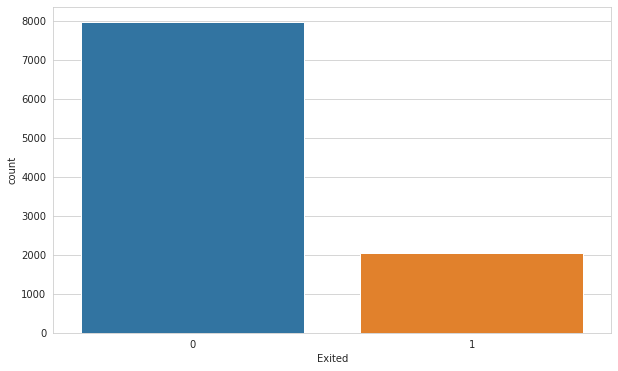

In [17]:
sns.countplot(df.Exited)

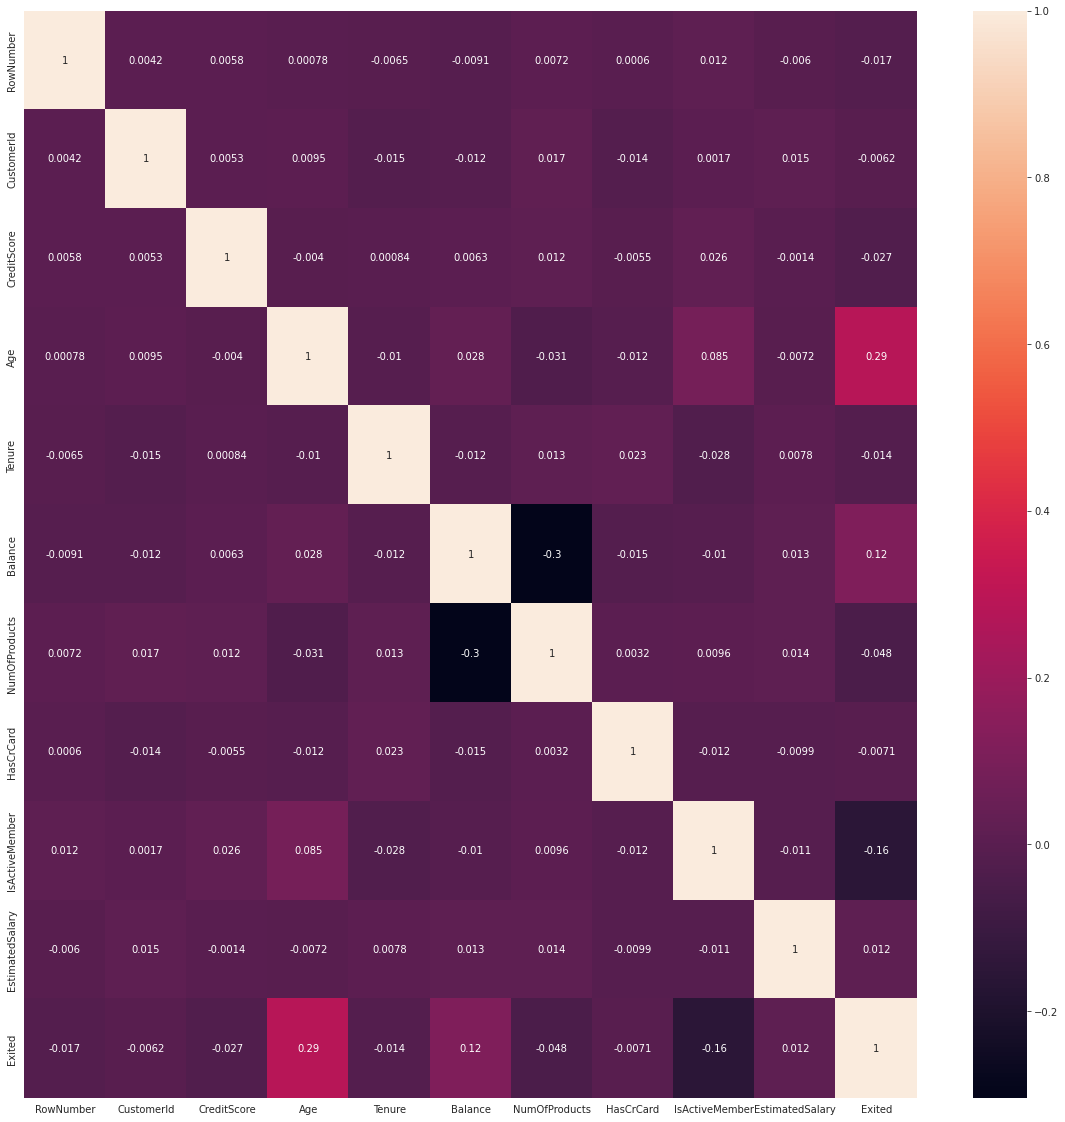

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

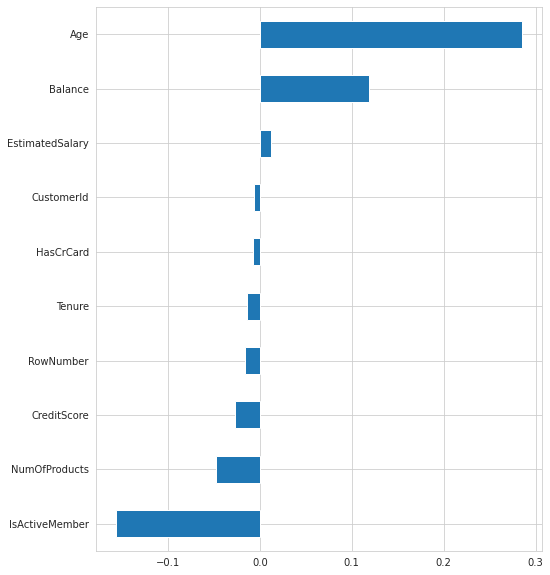

In [19]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [20]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [21]:
df=df.drop(drop_list, axis=1)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


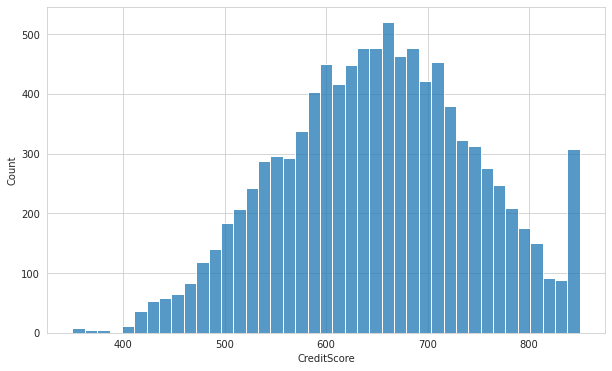

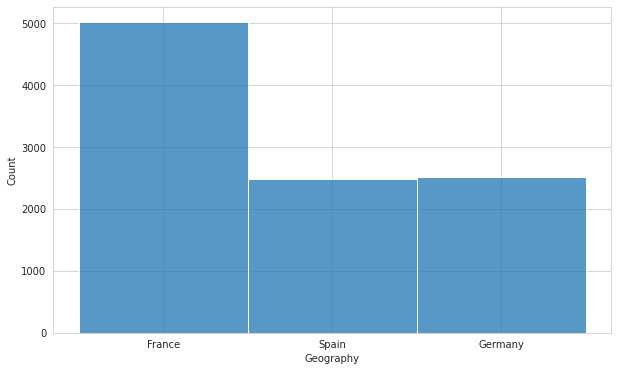

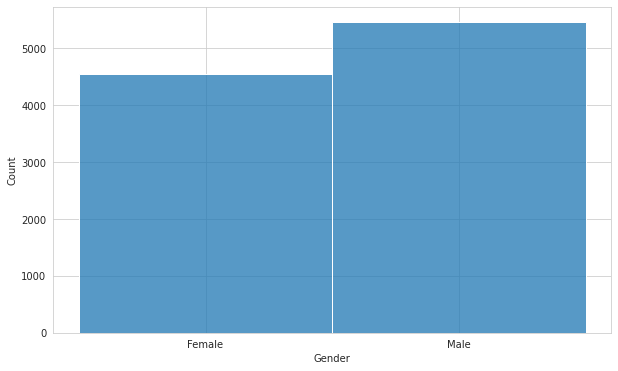

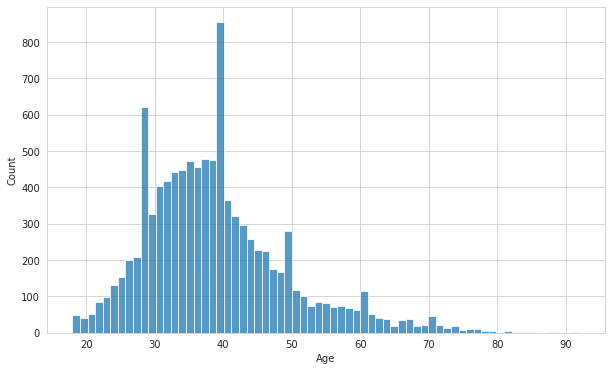

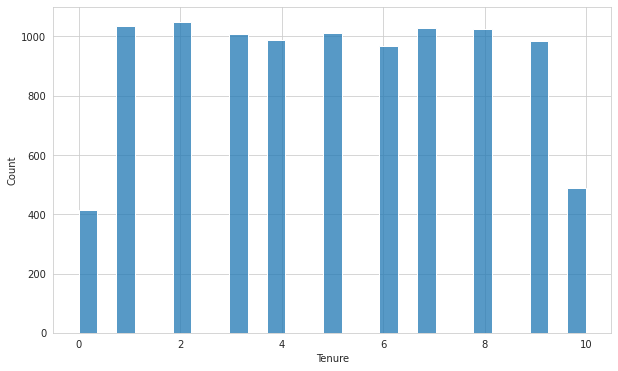

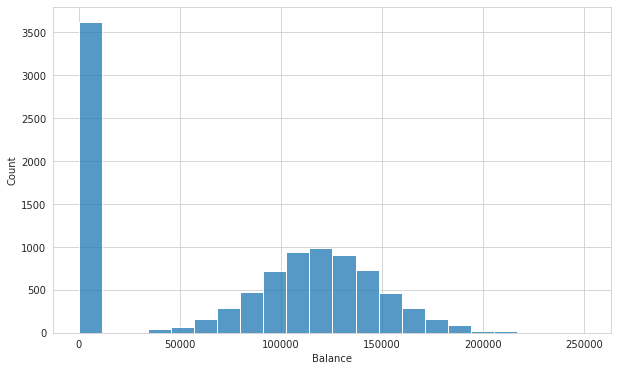

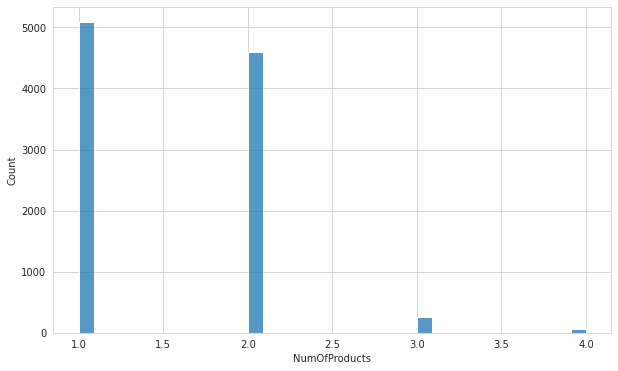

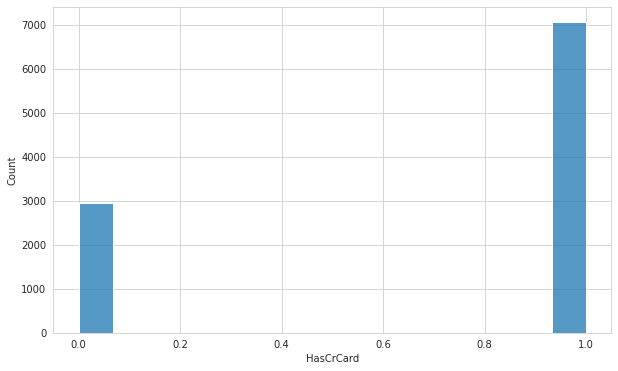

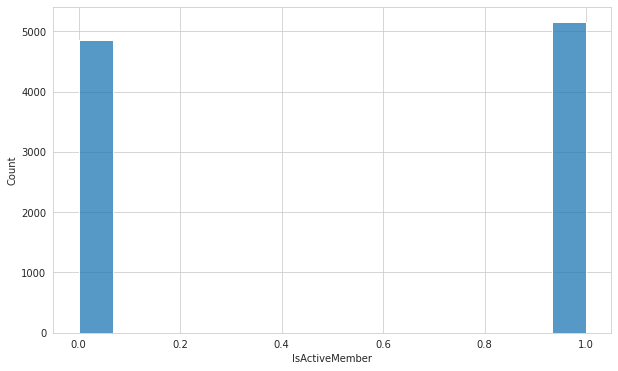

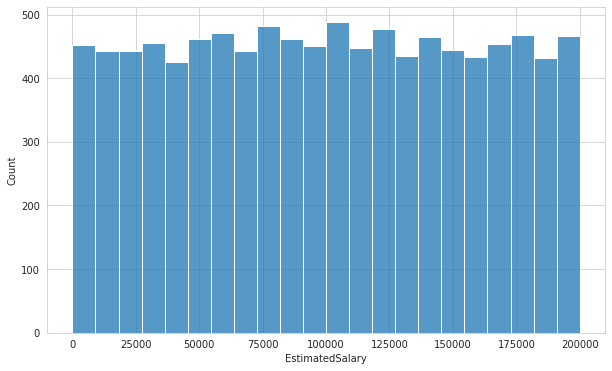

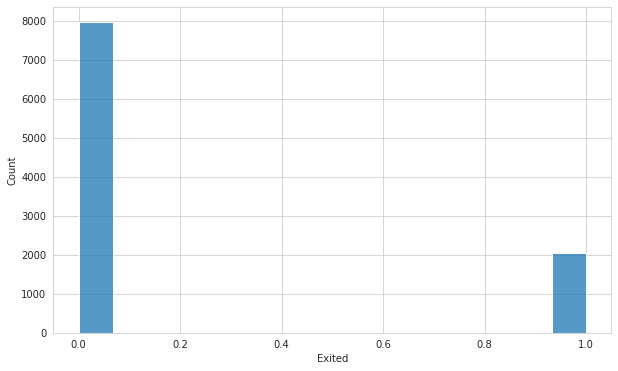

In [23]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

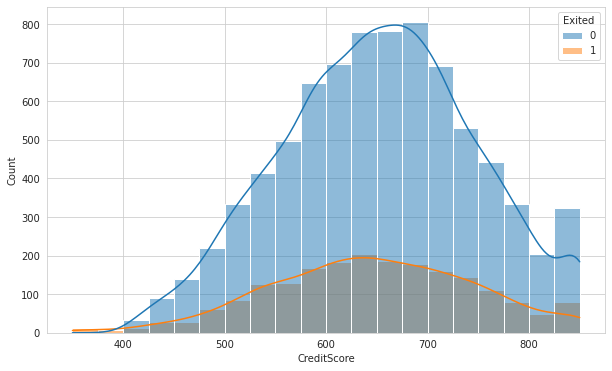

In [33]:
sns.histplot(data=df, x="CreditScore", hue="Exited", bins=20, kde=True);

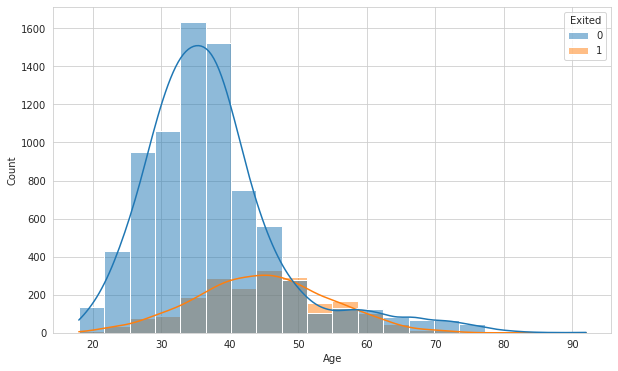

In [30]:
sns.histplot(data=df, x="Age", hue="Exited", bins=20, kde=True);

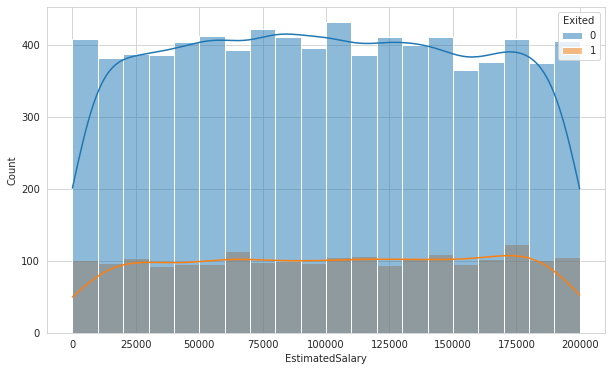

In [38]:
sns.histplot(data=df, x="EstimatedSalary", hue="Exited", bins=20, kde=True);

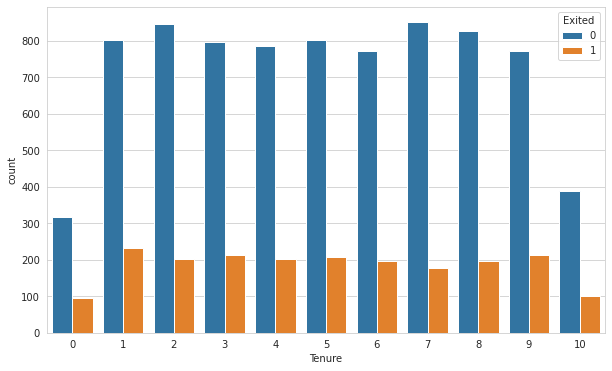

In [36]:
sns.countplot(data=df, x="Tenure", hue="Exited");

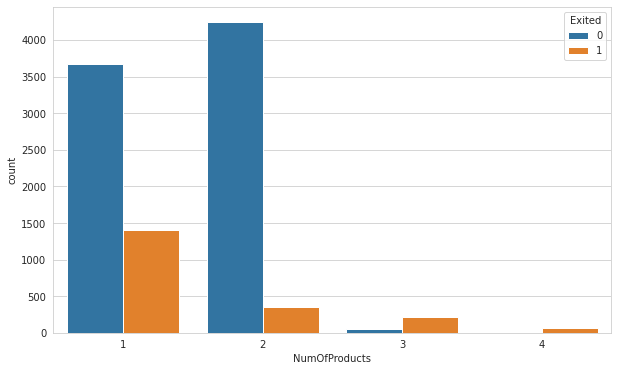

In [40]:
sns.countplot(data=df, x="NumOfProducts", hue="Exited");

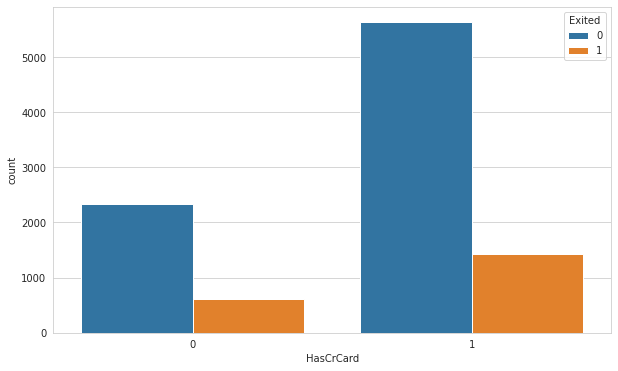

In [41]:
sns.countplot(data=df, x="HasCrCard", hue="Exited");

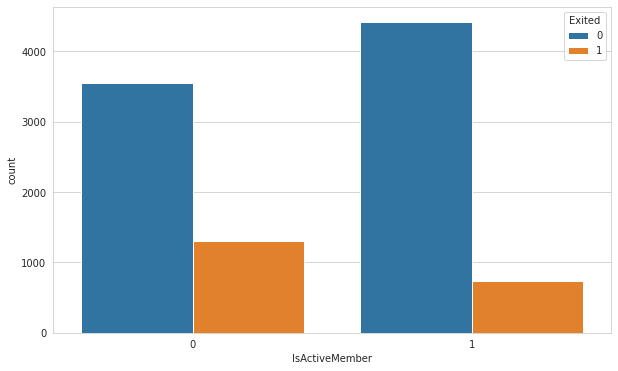

In [42]:
sns.countplot(data=df, x="IsActiveMember", hue="Exited");

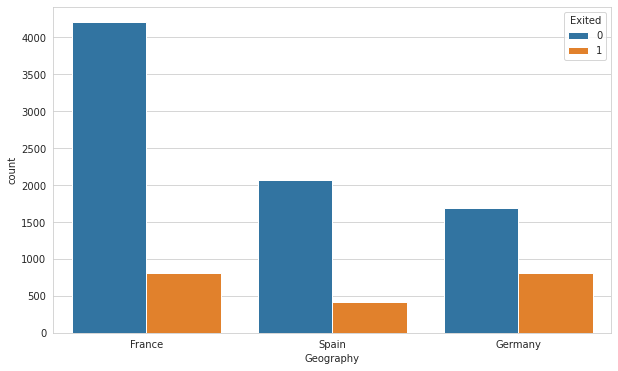

In [28]:
sns.countplot(data=df, x="Geography", hue="Exited");

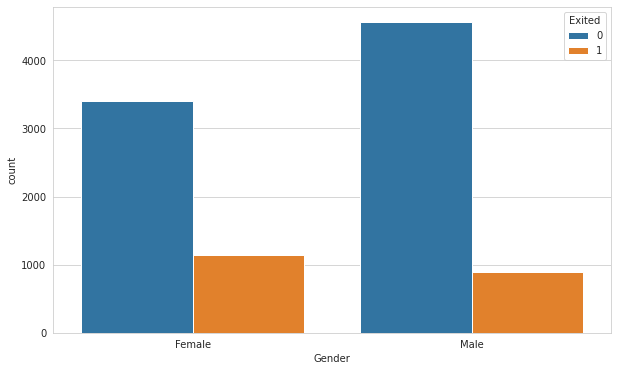

In [29]:
sns.countplot(data=df, x="Gender", hue="Exited");

In [44]:
df = pd.get_dummies(df, drop_first = True)

In [46]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [49]:
seed = 101

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [54]:
X_train.shape

(9000, 11)

In [55]:
X_test.shape

(1000, 11)

## without class_weigth

### Create The Model

In [102]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [103]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1)

Epoch 1/1000
127/127 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.7064 - val_loss: 0.5038 - val_accuracy: 0.7822
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7994 - val_loss: 0.4881 - val_accuracy: 0.7844
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8015 - val_loss: 0.4713 - val_accuracy: 0.7878
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8068 - val_loss: 0.4590 - val_accuracy: 0.7922
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8127 - val_loss: 0.4452 - val_accuracy: 0.8044
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8188 - val_loss: 0.4312 - val_accuracy: 0.8089
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8237 - val_loss: 0.4228 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                192       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.580,0.706,0.504,0.782
1,0.477,0.799,0.488,0.784
2,0.463,0.801,0.471,0.788
3,0.449,0.807,0.459,0.792
4,0.436,0.813,0.445,0.804


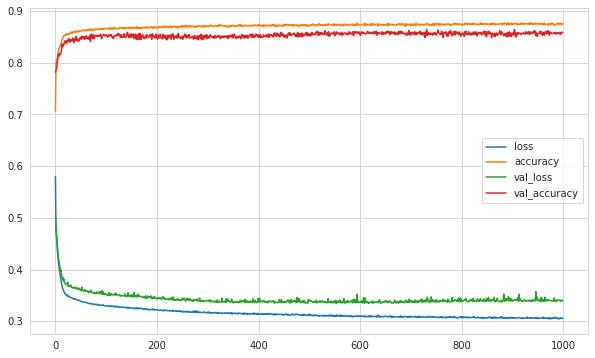

In [106]:
loss_df.plot();

In [107]:
model.evaluate(X_test, y_test, verbose=0)

[0.3818996846675873, 0.8489999771118164]

In [108]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3818996846675873
accuracy :  0.8489999771118164


In [109]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[765  31]
 [120  84]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.73      0.41      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [113]:
from sklearn.utils import class_weight

In [114]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [115]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [116]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
127/127 [==============================] - 1s 3ms/step - loss: 0.6588 - accuracy: 0.5881 - val_loss: 0.6546 - val_accuracy: 0.6544
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6747 - val_loss: 0.6286 - val_accuracy: 0.6767
Epoch 3/1000
127/127 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6921 - val_loss: 0.6401 - val_accuracy: 0.6722
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7067 - val_loss: 0.5813 - val_accuracy: 0.7011
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7249 - val_loss: 0.5559 - val_accuracy: 0.7200
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7264 - val_loss: 0.5711 - val_accuracy: 0.7089
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7369 - val_loss: 0.6013 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [117]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                192       
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [118]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.659,0.588,0.655,0.654
1,0.623,0.675,0.629,0.677
2,0.602,0.692,0.640,0.672
3,0.584,0.707,0.581,0.701
4,0.568,0.725,0.556,0.720


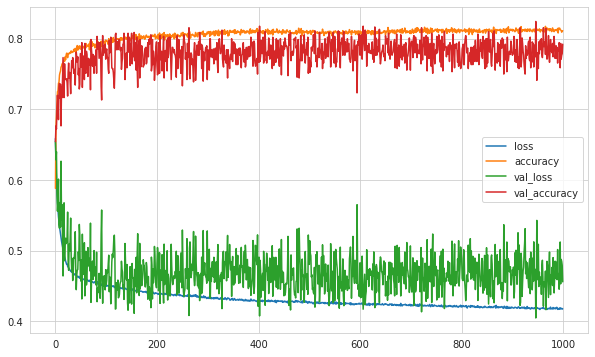

In [119]:
loss_df.plot();

In [120]:
model.evaluate(X_test, y_test, verbose=0)

[0.48676738142967224, 0.7699999809265137]

In [121]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.48676738142967224
accuracy :  0.7699999809265137


In [122]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[628 168]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       796
           1       0.46      0.70      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [146]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics= ["accuracy"])

In [147]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.6300 - accuracy: 0.6651 - val_loss: 0.5908 - val_accuracy: 0.6933
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7119 - val_loss: 0.5345 - val_accuracy: 0.7289
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7391 - val_loss: 0.4851 - val_accuracy: 0.7678
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7578 - val_loss: 0.4789 - val_accuracy: 0.7733
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7716 - val_loss: 0.5505 - val_accuracy: 0.7211
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7702 - val_loss: 0.4944 - val_accuracy: 0.7600
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7809 - val_loss: 0.5566 - val_accuracy:

In [148]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                192       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [149]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.630,0.665,0.591,0.693
1,0.570,0.712,0.534,0.729
2,0.542,0.739,0.485,0.768
3,0.514,0.758,0.479,0.773
4,0.496,0.772,0.551,0.721


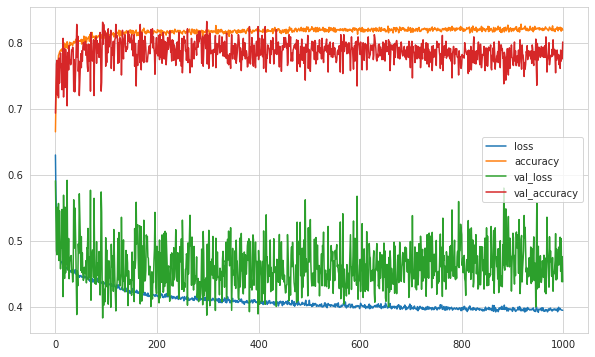

In [150]:
loss_df.plot();

In [151]:
model.evaluate(X_test, y_test, verbose=0)

[0.4943804442882538, 0.7799999713897705]

In [152]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4943804442882538
accuracy :  0.7799999713897705


In [153]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[653 143]
 [ 77 127]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       796
           1       0.47      0.62      0.54       204

    accuracy                           0.78      1000
   macro avg       0.68      0.72      0.70      1000
weighted avg       0.81      0.78      0.79      1000



### Add Dropout Layer

In [154]:
from tensorflow.keras.layers import Dropout

In [164]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics= ["accuracy"])

In [165]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
127/127 [==============================] - 1s 3ms/step - loss: 0.6839 - accuracy: 0.5951 - val_loss: 0.6393 - val_accuracy: 0.6989
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6701 - val_loss: 0.5946 - val_accuracy: 0.7222
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6889 - val_loss: 0.6016 - val_accuracy: 0.7022
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7162 - val_loss: 0.5973 - val_accuracy: 0.6878
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7247 - val_loss: 0.5623 - val_accuracy: 0.7511
Epoch 6/1000
127/127 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7417 - val_loss: 0.5773 - val_accuracy: 0.7400
Epoch 7/1000
127/127 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7436 - val_loss: 0.5830 - val_accuracy:

In [166]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 16)                192       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_55 (Dense)            (None, 8)                 136       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_56 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [167]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684,0.595,0.639,0.699
1,0.649,0.670,0.595,0.722
2,0.630,0.689,0.602,0.702
3,0.616,0.716,0.597,0.688
4,0.609,0.725,0.562,0.751


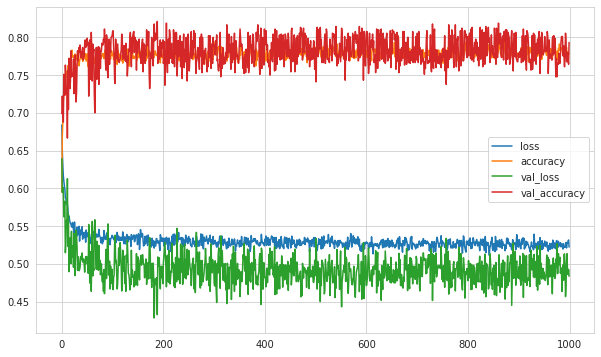

In [168]:
loss_df.plot();

In [169]:
model.evaluate(X_test, y_test, verbose=0)

[0.5006490349769592, 0.7760000228881836]

In [170]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5006490349769592
accuracy :  0.7760000228881836


In [171]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[645 151]
 [ 73 131]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       796
           1       0.46      0.64      0.54       204

    accuracy                           0.78      1000
   macro avg       0.68      0.73      0.70      1000
weighted avg       0.81      0.78      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [163]:
from tensorflow.keras.callbacks import EarlyStopping

In [172]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics= ["accuracy"])

In [173]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [174]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/1000
127/127 [==============================] - 1s 3ms/step - loss: 0.6839 - accuracy: 0.5951 - val_loss: 0.6393 - val_accuracy: 0.6989
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6701 - val_loss: 0.5946 - val_accuracy: 0.7222
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6889 - val_loss: 0.6016 - val_accuracy: 0.7022
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7162 - val_loss: 0.5973 - val_accuracy: 0.6878
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7247 - val_loss: 0.5623 - val_accuracy: 0.7511
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7417 - val_loss: 0.5773 - val_accuracy: 0.7400
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7436 - val_loss: 0.5830 - val_accuracy:

In [175]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                192       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [176]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684,0.595,0.639,0.699
1,0.649,0.670,0.595,0.722
2,0.630,0.689,0.602,0.702
3,0.616,0.716,0.597,0.688
4,0.609,0.725,0.562,0.751


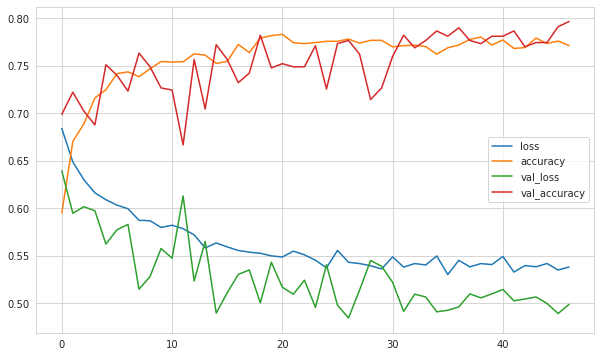

In [177]:
loss_df.plot();

In [178]:
model.evaluate(X_test, y_test, verbose=0)

[0.5032227635383606, 0.7770000100135803]

In [179]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5032227635383606
accuracy :  0.7770000100135803


In [180]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[638 158]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.68      0.55       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.70      1000
weighted avg       0.82      0.78      0.79      1000



#### Monitor the "val_recall" as metric

In [181]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics= ["accuracy"])

In [182]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [183]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.6855 - accuracy: 0.5901

127/127 [==============================] - 1s 4ms/step - loss: 0.6839 - accuracy: 0.5951 - val_loss: 0.6393 - val_accuracy: 0.6989
Epoch 2/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.6515 - accuracy: 0.6670

127/127 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6701 - val_loss: 0.5946 - val_accuracy: 0.7222
Epoch 3/1000
124/127 [============================>.] - ETA: 0s - loss: 0.6296 - accuracy: 0.6900

127/127 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6889 - val_loss: 0.6016 - val_accuracy: 0.7022
Epoch 4/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.6168 - accuracy: 0.7166

127/127 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7162 - val_loss: 0.5973 - val_accuracy: 0.6878
Epoch 5/1000
100/127 [======================>.......] - ETA: 0s - loss: 0.6079 - accuracy: 0.7228

127/127 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7247 - val_loss: 0.5623 - val_accuracy: 0.7511
Epoch 6/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.6053 - accuracy: 0.7355

127/127 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7417 - val_loss: 0.5773 - val_accuracy: 0.7400
Epoch 7/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5958 - accuracy: 0.7457

127/127 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7436 - val_loss: 0.5830 - val_accuracy: 0.7233
Epoch 8/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.7378

127/127 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7385 - val_loss: 0.5147 - val_accuracy: 0.7633
Epoch 9/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5884 - accuracy: 0.7469

127/127 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7468 - val_loss: 0.5280 - val_accuracy: 0.7489
Epoch 10/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5788 - accuracy: 0.7554

127/127 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7544 - val_loss: 0.5576 - val_accuracy: 0.7267
Epoch 11/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5851 - accuracy: 0.7514

127/127 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7540 - val_loss: 0.5473 - val_accuracy: 0.7244
Epoch 12/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5771 - accuracy: 0.7582

127/127 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7542 - val_loss: 0.6129 - val_accuracy: 0.6667
Epoch 13/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5711 - accuracy: 0.7587

127/127 [==============================] - 1s 4ms/step - loss: 0.5719 - accuracy: 0.7626 - val_loss: 0.5233 - val_accuracy: 0.7567
Epoch 14/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5559 - accuracy: 0.7633

127/127 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7612 - val_loss: 0.5650 - val_accuracy: 0.7044
Epoch 15/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5657 - accuracy: 0.7497

127/127 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7525 - val_loss: 0.4896 - val_accuracy: 0.7722
Epoch 16/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5606 - accuracy: 0.7560

127/127 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7546 - val_loss: 0.5109 - val_accuracy: 0.7567
Epoch 17/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5544 - accuracy: 0.7747

127/127 [==============================] - 1s 4ms/step - loss: 0.5555 - accuracy: 0.7725 - val_loss: 0.5303 - val_accuracy: 0.7322
Epoch 18/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7627

127/127 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7640 - val_loss: 0.5349 - val_accuracy: 0.7422
Epoch 19/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5530 - accuracy: 0.7781

127/127 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7791 - val_loss: 0.5004 - val_accuracy: 0.7822
Epoch 20/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5432 - accuracy: 0.7863

127/127 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7817 - val_loss: 0.5431 - val_accuracy: 0.7478
Epoch 21/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5494 - accuracy: 0.7817

127/127 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7831 - val_loss: 0.5168 - val_accuracy: 0.7522
Epoch 22/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5550 - accuracy: 0.7732

127/127 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7743 - val_loss: 0.5094 - val_accuracy: 0.7489
Epoch 23/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5493 - accuracy: 0.7742

127/127 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7733 - val_loss: 0.5242 - val_accuracy: 0.7489
Epoch 24/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7740

127/127 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7744 - val_loss: 0.4956 - val_accuracy: 0.7711
Epoch 25/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7769

127/127 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7758 - val_loss: 0.5404 - val_accuracy: 0.7256
Epoch 26/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5575 - accuracy: 0.7740

127/127 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7758 - val_loss: 0.4978 - val_accuracy: 0.7733
Epoch 27/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5449 - accuracy: 0.7771

127/127 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.7781 - val_loss: 0.4844 - val_accuracy: 0.7767
Epoch 28/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5400 - accuracy: 0.7743

127/127 [==============================] - 1s 4ms/step - loss: 0.5417 - accuracy: 0.7738 - val_loss: 0.5137 - val_accuracy: 0.7622
Epoch 29/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7776

127/127 [==============================] - 0s 4ms/step - loss: 0.5394 - accuracy: 0.7768 - val_loss: 0.5449 - val_accuracy: 0.7144
Epoch 30/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7773

127/127 [==============================] - 1s 8ms/step - loss: 0.5360 - accuracy: 0.7768 - val_loss: 0.5389 - val_accuracy: 0.7267
Epoch 31/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5476 - accuracy: 0.7681

127/127 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7699 - val_loss: 0.5219 - val_accuracy: 0.7600
Epoch 32/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7681

127/127 [==============================] - 1s 4ms/step - loss: 0.5379 - accuracy: 0.7712 - val_loss: 0.4913 - val_accuracy: 0.7822
Epoch 33/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7715

127/127 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7716 - val_loss: 0.5095 - val_accuracy: 0.7689
Epoch 34/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7700

127/127 [==============================] - 1s 5ms/step - loss: 0.5402 - accuracy: 0.7702 - val_loss: 0.5065 - val_accuracy: 0.7767
Epoch 35/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5510 - accuracy: 0.7613

127/127 [==============================] - 1s 4ms/step - loss: 0.5497 - accuracy: 0.7622 - val_loss: 0.4908 - val_accuracy: 0.7867
Epoch 36/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7688

127/127 [==============================] - 1s 4ms/step - loss: 0.5301 - accuracy: 0.7690 - val_loss: 0.4925 - val_accuracy: 0.7811
Epoch 37/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5422 - accuracy: 0.7706

127/127 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7719 - val_loss: 0.4961 - val_accuracy: 0.7900
Epoch 38/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7792

127/127 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7778 - val_loss: 0.5098 - val_accuracy: 0.7767
Epoch 39/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7822

127/127 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7802 - val_loss: 0.5056 - val_accuracy: 0.7733
Epoch 40/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7681

127/127 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7719 - val_loss: 0.5098 - val_accuracy: 0.7811
Epoch 41/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5495 - accuracy: 0.7747

127/127 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7772 - val_loss: 0.5145 - val_accuracy: 0.7811
Epoch 42/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7694

127/127 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7683 - val_loss: 0.5024 - val_accuracy: 0.7867
Epoch 43/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7685

127/127 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7691 - val_loss: 0.5044 - val_accuracy: 0.7700
Epoch 44/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7810

127/127 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7791 - val_loss: 0.5065 - val_accuracy: 0.7744
Epoch 45/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.7724

127/127 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7735 - val_loss: 0.4997 - val_accuracy: 0.7744
Epoch 46/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7718

127/127 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7760 - val_loss: 0.4890 - val_accuracy: 0.7911
Epoch 47/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7751

127/127 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7712 - val_loss: 0.4988 - val_accuracy: 0.7967
Epoch 48/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5248 - accuracy: 0.7781

127/127 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7784 - val_loss: 0.5095 - val_accuracy: 0.7867
Epoch 49/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.7694

127/127 [==============================] - 1s 4ms/step - loss: 0.5449 - accuracy: 0.7685 - val_loss: 0.5076 - val_accuracy: 0.7911
Epoch 50/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7723

127/127 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7738 - val_loss: 0.5098 - val_accuracy: 0.7889
Epoch 51/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7779

127/127 [==============================] - 1s 5ms/step - loss: 0.5411 - accuracy: 0.7780 - val_loss: 0.4997 - val_accuracy: 0.7989
Epoch 52/1000
127/127 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.7759

127/127 [==============================] - 1s 6ms/step - loss: 0.5365 - accuracy: 0.7759 - val_loss: 0.5020 - val_accuracy: 0.7900
Epoch 53/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5397 - accuracy: 0.7587

127/127 [==============================] - 1s 5ms/step - loss: 0.5373 - accuracy: 0.7612 - val_loss: 0.4876 - val_accuracy: 0.7933
Epoch 54/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7880

127/127 [==============================] - 1s 4ms/step - loss: 0.5326 - accuracy: 0.7837 - val_loss: 0.5522 - val_accuracy: 0.7222
Epoch 55/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7737

127/127 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7756 - val_loss: 0.5243 - val_accuracy: 0.7656
Epoch 56/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5407 - accuracy: 0.7742

127/127 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7746 - val_loss: 0.4746 - val_accuracy: 0.7967
Epoch 57/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7721

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7735 - val_loss: 0.4991 - val_accuracy: 0.7778
Epoch 58/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7626

127/127 [==============================] - 1s 4ms/step - loss: 0.5340 - accuracy: 0.7630 - val_loss: 0.5162 - val_accuracy: 0.7444
Epoch 59/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5324 - accuracy: 0.7673

127/127 [==============================] - 1s 4ms/step - loss: 0.5300 - accuracy: 0.7702 - val_loss: 0.4637 - val_accuracy: 0.8067
Epoch 60/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7621

127/127 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7636 - val_loss: 0.5153 - val_accuracy: 0.7844
Epoch 61/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5248 - accuracy: 0.7858

127/127 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7828 - val_loss: 0.5563 - val_accuracy: 0.7422
Epoch 62/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5430 - accuracy: 0.7652

127/127 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7658 - val_loss: 0.4841 - val_accuracy: 0.7911
Epoch 63/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7718

127/127 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7691 - val_loss: 0.4964 - val_accuracy: 0.7789
Epoch 64/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7643

127/127 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7660 - val_loss: 0.4912 - val_accuracy: 0.7844
Epoch 65/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7726

127/127 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7716 - val_loss: 0.5434 - val_accuracy: 0.7256
Epoch 66/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7697

127/127 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.7658 - val_loss: 0.5584 - val_accuracy: 0.7000
Epoch 67/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7771

127/127 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7744 - val_loss: 0.5430 - val_accuracy: 0.7344
Epoch 68/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7768

127/127 [==============================] - 1s 4ms/step - loss: 0.5399 - accuracy: 0.7769 - val_loss: 0.5092 - val_accuracy: 0.7700
Epoch 69/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7788

127/127 [==============================] - 1s 4ms/step - loss: 0.5355 - accuracy: 0.7765 - val_loss: 0.4930 - val_accuracy: 0.7867
Epoch 70/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5329 - accuracy: 0.7775

127/127 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7759 - val_loss: 0.5299 - val_accuracy: 0.7444
Epoch 71/1000
 97/127 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7722

127/127 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7720 - val_loss: 0.4931 - val_accuracy: 0.7844
Epoch 72/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7751

127/127 [==============================] - 0s 4ms/step - loss: 0.5355 - accuracy: 0.7744 - val_loss: 0.5245 - val_accuracy: 0.7756
Epoch 73/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5396 - accuracy: 0.7672

127/127 [==============================] - 1s 4ms/step - loss: 0.5381 - accuracy: 0.7669 - val_loss: 0.4914 - val_accuracy: 0.7878
Epoch 74/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5445 - accuracy: 0.7770

127/127 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.7760 - val_loss: 0.5244 - val_accuracy: 0.7378
Epoch 75/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7669

127/127 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7689 - val_loss: 0.4932 - val_accuracy: 0.7867
Epoch 76/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7656

127/127 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7684 - val_loss: 0.5049 - val_accuracy: 0.7811
Epoch 77/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7779 - val_loss: 0.4855 - val_accuracy: 0.7589
Epoch 78/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5292 - accuracy: 0.7721

127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7731 - val_loss: 0.4888 - val_accuracy: 0.7800
Epoch 79/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7708

127/127 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7725 - val_loss: 0.5000 - val_accuracy: 0.7822
Epoch 80/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7761

127/127 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7760 - val_loss: 0.4820 - val_accuracy: 0.7922
Epoch 81/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7750

127/127 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7760 - val_loss: 0.4761 - val_accuracy: 0.7911
Epoch 82/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7811

127/127 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7789 - val_loss: 0.4874 - val_accuracy: 0.7900
Epoch 83/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.7743

127/127 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7753 - val_loss: 0.4636 - val_accuracy: 0.7978
Epoch 84/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7718

127/127 [==============================] - 1s 5ms/step - loss: 0.5441 - accuracy: 0.7720 - val_loss: 0.4925 - val_accuracy: 0.7933
Epoch 85/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7736

127/127 [==============================] - 1s 6ms/step - loss: 0.5389 - accuracy: 0.7749 - val_loss: 0.4605 - val_accuracy: 0.8111
Epoch 86/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7830

127/127 [==============================] - 1s 5ms/step - loss: 0.5329 - accuracy: 0.7830 - val_loss: 0.4746 - val_accuracy: 0.7967
Epoch 87/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7741 - val_loss: 0.4982 - val_accuracy: 0.7667
Epoch 88/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7711

127/127 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7701 - val_loss: 0.5190 - val_accuracy: 0.7567
Epoch 89/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7640

127/127 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7654 - val_loss: 0.4806 - val_accuracy: 0.8033
Epoch 90/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7821

127/127 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7795 - val_loss: 0.5112 - val_accuracy: 0.7978
Epoch 91/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7836

127/127 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7832 - val_loss: 0.5366 - val_accuracy: 0.7544
Epoch 92/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7769

127/127 [==============================] - 1s 6ms/step - loss: 0.5294 - accuracy: 0.7765 - val_loss: 0.5529 - val_accuracy: 0.7467
Epoch 93/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7706

127/127 [==============================] - 1s 6ms/step - loss: 0.5315 - accuracy: 0.7710 - val_loss: 0.4851 - val_accuracy: 0.7844
Epoch 94/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7749

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7749 - val_loss: 0.4878 - val_accuracy: 0.7978
Epoch 95/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7807

127/127 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.7762 - val_loss: 0.5036 - val_accuracy: 0.7644
Epoch 96/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5245 - accuracy: 0.7747

127/127 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7746 - val_loss: 0.4667 - val_accuracy: 0.7933
Epoch 97/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5316 - accuracy: 0.7702

127/127 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7711 - val_loss: 0.4972 - val_accuracy: 0.7800
Epoch 98/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7771

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7773 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 99/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7820

127/127 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7822 - val_loss: 0.4745 - val_accuracy: 0.8011
Epoch 100/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7782

127/127 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7779 - val_loss: 0.4928 - val_accuracy: 0.8011
Epoch 101/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7754

127/127 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.7759 - val_loss: 0.4708 - val_accuracy: 0.8078
Epoch 102/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7781

127/127 [==============================] - 1s 5ms/step - loss: 0.5341 - accuracy: 0.7784 - val_loss: 0.4658 - val_accuracy: 0.8089
Epoch 103/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7704

127/127 [==============================] - 1s 6ms/step - loss: 0.5327 - accuracy: 0.7706 - val_loss: 0.4819 - val_accuracy: 0.7889
Epoch 104/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7782

127/127 [==============================] - 1s 6ms/step - loss: 0.5352 - accuracy: 0.7777 - val_loss: 0.4851 - val_accuracy: 0.7744
Epoch 105/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5302 - accuracy: 0.7831

127/127 [==============================] - 1s 7ms/step - loss: 0.5295 - accuracy: 0.7800 - val_loss: 0.5267 - val_accuracy: 0.7433
Epoch 106/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7774

127/127 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7763 - val_loss: 0.5378 - val_accuracy: 0.7389
Epoch 107/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7795

127/127 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7749 - val_loss: 0.5018 - val_accuracy: 0.7978
Epoch 108/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7835

127/127 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7836 - val_loss: 0.5046 - val_accuracy: 0.7844
Epoch 109/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7761

127/127 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7730 - val_loss: 0.4890 - val_accuracy: 0.7722
Epoch 110/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5434 - accuracy: 0.7620

127/127 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7643 - val_loss: 0.4668 - val_accuracy: 0.7900
Epoch 111/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7776

127/127 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7779 - val_loss: 0.4740 - val_accuracy: 0.7911
Epoch 112/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7825

127/127 [==============================] - 1s 5ms/step - loss: 0.5313 - accuracy: 0.7831 - val_loss: 0.4983 - val_accuracy: 0.7689
Epoch 113/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7724

127/127 [==============================] - 1s 4ms/step - loss: 0.5367 - accuracy: 0.7723 - val_loss: 0.5211 - val_accuracy: 0.7711
Epoch 114/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7769 - val_loss: 0.4979 - val_accuracy: 0.7667
Epoch 115/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7790

127/127 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7779 - val_loss: 0.5050 - val_accuracy: 0.7689
Epoch 116/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5259 - accuracy: 0.7762

127/127 [==============================] - 1s 4ms/step - loss: 0.5312 - accuracy: 0.7737 - val_loss: 0.5283 - val_accuracy: 0.7722
Epoch 117/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7736

127/127 [==============================] - 1s 6ms/step - loss: 0.5353 - accuracy: 0.7733 - val_loss: 0.5131 - val_accuracy: 0.7778
Epoch 118/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7707

127/127 [==============================] - 1s 4ms/step - loss: 0.5339 - accuracy: 0.7704 - val_loss: 0.4964 - val_accuracy: 0.7833
Epoch 119/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7673

127/127 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7690 - val_loss: 0.4642 - val_accuracy: 0.8044
Epoch 120/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7763

127/127 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7764 - val_loss: 0.4653 - val_accuracy: 0.7978
Epoch 121/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7679

127/127 [==============================] - 1s 4ms/step - loss: 0.5423 - accuracy: 0.7659 - val_loss: 0.5181 - val_accuracy: 0.7711
Epoch 122/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7696

127/127 [==============================] - 1s 5ms/step - loss: 0.5342 - accuracy: 0.7715 - val_loss: 0.5051 - val_accuracy: 0.7756
Epoch 123/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5245 - accuracy: 0.7761

127/127 [==============================] - 1s 7ms/step - loss: 0.5268 - accuracy: 0.7756 - val_loss: 0.4903 - val_accuracy: 0.7889
Epoch 124/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7849

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7822 - val_loss: 0.5101 - val_accuracy: 0.7778
Epoch 125/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7746 - val_loss: 0.4741 - val_accuracy: 0.7889
Epoch 126/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7755

127/127 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7751 - val_loss: 0.4859 - val_accuracy: 0.7689
Epoch 127/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7694

127/127 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7707 - val_loss: 0.4635 - val_accuracy: 0.7922
Epoch 128/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7668

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7707 - val_loss: 0.5115 - val_accuracy: 0.7678
Epoch 129/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7688

127/127 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7706 - val_loss: 0.5022 - val_accuracy: 0.7756
Epoch 130/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7726 - val_loss: 0.5314 - val_accuracy: 0.7489
Epoch 131/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7864

127/127 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7846 - val_loss: 0.5125 - val_accuracy: 0.7622
Epoch 132/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7803

127/127 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.7814 - val_loss: 0.4876 - val_accuracy: 0.7733
Epoch 133/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7646

127/127 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7622 - val_loss: 0.4860 - val_accuracy: 0.7844
Epoch 134/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7591

127/127 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7621 - val_loss: 0.4800 - val_accuracy: 0.7811
Epoch 135/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7619

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7648 - val_loss: 0.4655 - val_accuracy: 0.7989
Epoch 136/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7786

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7796 - val_loss: 0.4805 - val_accuracy: 0.8067
Epoch 137/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5256 - accuracy: 0.7811

127/127 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7811 - val_loss: 0.4724 - val_accuracy: 0.7889
Epoch 138/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7738

127/127 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7727 - val_loss: 0.5181 - val_accuracy: 0.7611
Epoch 139/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7719

127/127 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7719 - val_loss: 0.4824 - val_accuracy: 0.8000
Epoch 140/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7825

127/127 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7828 - val_loss: 0.4916 - val_accuracy: 0.7789
Epoch 141/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7739

127/127 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7754 - val_loss: 0.4826 - val_accuracy: 0.8033
Epoch 142/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7718

127/127 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7725 - val_loss: 0.4836 - val_accuracy: 0.8067
Epoch 143/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5428 - accuracy: 0.7754

127/127 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7752 - val_loss: 0.4695 - val_accuracy: 0.8078
Epoch 144/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7729

127/127 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7719 - val_loss: 0.4853 - val_accuracy: 0.7800
Epoch 145/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5294 - accuracy: 0.7741

127/127 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7736 - val_loss: 0.4897 - val_accuracy: 0.8000
Epoch 146/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7710

127/127 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7737 - val_loss: 0.4719 - val_accuracy: 0.7922
Epoch 147/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5457 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7788 - val_loss: 0.4851 - val_accuracy: 0.7967
Epoch 148/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7788

127/127 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7775 - val_loss: 0.5135 - val_accuracy: 0.7567
Epoch 149/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7708

127/127 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7699 - val_loss: 0.4819 - val_accuracy: 0.7944
Epoch 150/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7828

127/127 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7836 - val_loss: 0.4715 - val_accuracy: 0.7789
Epoch 151/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7817

127/127 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7770 - val_loss: 0.5092 - val_accuracy: 0.7878
Epoch 152/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7744

127/127 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7774 - val_loss: 0.4843 - val_accuracy: 0.7878
Epoch 153/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7652

127/127 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7730 - val_loss: 0.4995 - val_accuracy: 0.7978
Epoch 154/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5200 - accuracy: 0.7836

127/127 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7817 - val_loss: 0.4788 - val_accuracy: 0.7822
Epoch 155/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7833

127/127 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7817 - val_loss: 0.5047 - val_accuracy: 0.7756
Epoch 156/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7741

127/127 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7738 - val_loss: 0.5062 - val_accuracy: 0.7722
Epoch 157/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7836

127/127 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7815 - val_loss: 0.5113 - val_accuracy: 0.7656
Epoch 158/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7689

127/127 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7700 - val_loss: 0.4983 - val_accuracy: 0.7844
Epoch 159/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7810

127/127 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7795 - val_loss: 0.5048 - val_accuracy: 0.7922
Epoch 160/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7919

127/127 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7835 - val_loss: 0.5123 - val_accuracy: 0.7978
Epoch 161/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7723 - val_loss: 0.5065 - val_accuracy: 0.7544
Epoch 162/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5217 - accuracy: 0.7871

127/127 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7881 - val_loss: 0.4994 - val_accuracy: 0.7922
Epoch 163/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5229 - accuracy: 0.7874

127/127 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7858 - val_loss: 0.4996 - val_accuracy: 0.7867
Epoch 164/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7716

127/127 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7748 - val_loss: 0.4815 - val_accuracy: 0.7900
Epoch 165/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7742

127/127 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7737 - val_loss: 0.4971 - val_accuracy: 0.7656
Epoch 166/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.7757

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7754 - val_loss: 0.4845 - val_accuracy: 0.7789
Epoch 167/1000
127/127 [==============================] - ETA: 0s - loss: 0.5332 - accuracy: 0.7689

127/127 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7689 - val_loss: 0.5065 - val_accuracy: 0.7756
Epoch 168/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7752

127/127 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7756 - val_loss: 0.4729 - val_accuracy: 0.8100
Epoch 169/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7722

127/127 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7725 - val_loss: 0.4850 - val_accuracy: 0.7944
Epoch 170/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5234 - accuracy: 0.7863

127/127 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7880 - val_loss: 0.4843 - val_accuracy: 0.7956
Epoch 171/1000
127/127 [==============================] - ETA: 0s - loss: 0.5383 - accuracy: 0.7747

127/127 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.7747 - val_loss: 0.5018 - val_accuracy: 0.7889
Epoch 172/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.7788

127/127 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7799 - val_loss: 0.4800 - val_accuracy: 0.8078
Epoch 173/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5296 - accuracy: 0.7827

127/127 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7822 - val_loss: 0.5196 - val_accuracy: 0.7522
Epoch 174/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7781

127/127 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7764 - val_loss: 0.5345 - val_accuracy: 0.7322
Epoch 175/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7822

127/127 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7785 - val_loss: 0.5173 - val_accuracy: 0.7478
Epoch 176/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7763

127/127 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7805 - val_loss: 0.4811 - val_accuracy: 0.7789
Epoch 177/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5191 - accuracy: 0.7799

127/127 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7774 - val_loss: 0.4981 - val_accuracy: 0.7722
Epoch 178/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7744

127/127 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7793 - val_loss: 0.4686 - val_accuracy: 0.8000
Epoch 179/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7732

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7714 - val_loss: 0.5007 - val_accuracy: 0.7833
Epoch 180/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7808

127/127 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7825 - val_loss: 0.4775 - val_accuracy: 0.7967
Epoch 181/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7834

127/127 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7783 - val_loss: 0.5009 - val_accuracy: 0.7622
Epoch 182/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5240 - accuracy: 0.7734

127/127 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7731 - val_loss: 0.4809 - val_accuracy: 0.7944
Epoch 183/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7759

127/127 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7802 - val_loss: 0.4283 - val_accuracy: 0.8178
Epoch 184/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7771

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7778 - val_loss: 0.4731 - val_accuracy: 0.7956
Epoch 185/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7817

127/127 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7821 - val_loss: 0.4802 - val_accuracy: 0.8056
Epoch 186/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5247 - accuracy: 0.7790

127/127 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7770 - val_loss: 0.4724 - val_accuracy: 0.8022
Epoch 187/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7779

127/127 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7763 - val_loss: 0.4744 - val_accuracy: 0.7978
Epoch 188/1000
100/127 [======================>.......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7733

127/127 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7758 - val_loss: 0.4816 - val_accuracy: 0.8022
Epoch 189/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7775 - val_loss: 0.4326 - val_accuracy: 0.8211
Epoch 190/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5298 - accuracy: 0.7824

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7815 - val_loss: 0.5092 - val_accuracy: 0.7656
Epoch 191/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7804

127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7811 - val_loss: 0.5064 - val_accuracy: 0.7778
Epoch 192/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7799

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7772 - val_loss: 0.4972 - val_accuracy: 0.7878
Epoch 193/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5285 - accuracy: 0.7846

127/127 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7849 - val_loss: 0.5080 - val_accuracy: 0.7711
Epoch 194/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5249 - accuracy: 0.7753

127/127 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7793 - val_loss: 0.4777 - val_accuracy: 0.7867
Epoch 195/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7649

127/127 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7663 - val_loss: 0.4669 - val_accuracy: 0.7967
Epoch 196/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7766

127/127 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7763 - val_loss: 0.4958 - val_accuracy: 0.7744
Epoch 197/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7721

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7744 - val_loss: 0.4969 - val_accuracy: 0.7922
Epoch 198/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7729

127/127 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7741 - val_loss: 0.4814 - val_accuracy: 0.7933
Epoch 199/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5285 - accuracy: 0.7798

127/127 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7767 - val_loss: 0.4961 - val_accuracy: 0.7856
Epoch 200/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7693

127/127 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7731 - val_loss: 0.4738 - val_accuracy: 0.7967
Epoch 201/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7821

127/127 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7817 - val_loss: 0.5012 - val_accuracy: 0.7656
Epoch 202/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5197 - accuracy: 0.7890

127/127 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7881 - val_loss: 0.5097 - val_accuracy: 0.7700
Epoch 203/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.7819

127/127 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7807 - val_loss: 0.5194 - val_accuracy: 0.7944
Epoch 204/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7717

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7694 - val_loss: 0.5283 - val_accuracy: 0.7367
Epoch 205/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5244 - accuracy: 0.7795

127/127 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7778 - val_loss: 0.5111 - val_accuracy: 0.7656
Epoch 206/1000
 99/127 [======================>.......] - ETA: 0s - loss: 0.5283 - accuracy: 0.7827

127/127 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7833 - val_loss: 0.4952 - val_accuracy: 0.7689
Epoch 207/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7667

127/127 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7717 - val_loss: 0.4696 - val_accuracy: 0.8189
Epoch 208/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5267 - accuracy: 0.7824

127/127 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7774 - val_loss: 0.5067 - val_accuracy: 0.7700
Epoch 209/1000
127/127 [==============================] - ETA: 0s - loss: 0.5332 - accuracy: 0.7716

127/127 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7716 - val_loss: 0.5114 - val_accuracy: 0.7533
Epoch 210/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5188 - accuracy: 0.7789

127/127 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7801 - val_loss: 0.4789 - val_accuracy: 0.7889
Epoch 211/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7754

127/127 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7759 - val_loss: 0.4757 - val_accuracy: 0.7978
Epoch 212/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7891

127/127 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7870 - val_loss: 0.5176 - val_accuracy: 0.7656
Epoch 213/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7822

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7809 - val_loss: 0.4785 - val_accuracy: 0.8100
Epoch 214/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7747

127/127 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7763 - val_loss: 0.4733 - val_accuracy: 0.8044
Epoch 215/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5176 - accuracy: 0.7881

127/127 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7888 - val_loss: 0.4795 - val_accuracy: 0.7722
Epoch 216/1000
127/127 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.7737

127/127 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7737 - val_loss: 0.4906 - val_accuracy: 0.7756
Epoch 217/1000
 99/127 [======================>.......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7764

127/127 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7801 - val_loss: 0.4887 - val_accuracy: 0.7922
Epoch 218/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7770 - val_loss: 0.5270 - val_accuracy: 0.7667
Epoch 219/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5224 - accuracy: 0.7766

127/127 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7759 - val_loss: 0.4948 - val_accuracy: 0.7678
Epoch 220/1000
127/127 [==============================] - ETA: 0s - loss: 0.5387 - accuracy: 0.7733

127/127 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7733 - val_loss: 0.5015 - val_accuracy: 0.7656
Epoch 221/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7744

127/127 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7741 - val_loss: 0.4848 - val_accuracy: 0.8100
Epoch 222/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7801

127/127 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7820 - val_loss: 0.4705 - val_accuracy: 0.7933
Epoch 223/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7723

127/127 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7717 - val_loss: 0.4993 - val_accuracy: 0.7611
Epoch 224/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7746

127/127 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7762 - val_loss: 0.4685 - val_accuracy: 0.8056
Epoch 225/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5432 - accuracy: 0.7780

127/127 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7756 - val_loss: 0.5086 - val_accuracy: 0.7778
Epoch 226/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7911

127/127 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7877 - val_loss: 0.4960 - val_accuracy: 0.8067
Epoch 227/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7776

127/127 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7795 - val_loss: 0.4762 - val_accuracy: 0.8056
Epoch 228/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7846

127/127 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7837 - val_loss: 0.5470 - val_accuracy: 0.7489
Epoch 229/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7668

127/127 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7698 - val_loss: 0.4933 - val_accuracy: 0.7678
Epoch 230/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7716

127/127 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7730 - val_loss: 0.4791 - val_accuracy: 0.7956
Epoch 231/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5434 - accuracy: 0.7726

127/127 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7700 - val_loss: 0.5072 - val_accuracy: 0.7744
Epoch 232/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7812

127/127 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7773 - val_loss: 0.4887 - val_accuracy: 0.7856
Epoch 233/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7815

127/127 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7791 - val_loss: 0.4764 - val_accuracy: 0.7989
Epoch 234/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7655

127/127 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7685 - val_loss: 0.4738 - val_accuracy: 0.8022
Epoch 235/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7818

127/127 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7828 - val_loss: 0.5263 - val_accuracy: 0.7611
Epoch 236/1000
100/127 [======================>.......] - ETA: 0s - loss: 0.5275 - accuracy: 0.7889

127/127 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7858 - val_loss: 0.4958 - val_accuracy: 0.7778
Epoch 237/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7776

127/127 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7795 - val_loss: 0.4892 - val_accuracy: 0.7944
Epoch 238/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5247 - accuracy: 0.7823

127/127 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7806 - val_loss: 0.5243 - val_accuracy: 0.7456
Epoch 239/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7703

127/127 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7759 - val_loss: 0.4729 - val_accuracy: 0.7889
Epoch 240/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5231 - accuracy: 0.7777

127/127 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7762 - val_loss: 0.4796 - val_accuracy: 0.7889
Epoch 241/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5336 - accuracy: 0.7788

127/127 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7758 - val_loss: 0.4859 - val_accuracy: 0.8044
Epoch 242/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5202 - accuracy: 0.7886

127/127 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7802 - val_loss: 0.5223 - val_accuracy: 0.7600
Epoch 243/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7827

127/127 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7769 - val_loss: 0.5260 - val_accuracy: 0.7711
Epoch 244/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5278 - accuracy: 0.7823

127/127 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7811 - val_loss: 0.4816 - val_accuracy: 0.7844
Epoch 245/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5335 - accuracy: 0.7822

127/127 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7777 - val_loss: 0.5059 - val_accuracy: 0.7678
Epoch 246/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5293 - accuracy: 0.7729

127/127 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7746 - val_loss: 0.4802 - val_accuracy: 0.8000
Epoch 247/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7781

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7765 - val_loss: 0.5056 - val_accuracy: 0.7744
Epoch 248/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7734

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7720 - val_loss: 0.5193 - val_accuracy: 0.7422
Epoch 249/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7735

127/127 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7754 - val_loss: 0.4854 - val_accuracy: 0.8022
Epoch 250/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5343 - accuracy: 0.7677

127/127 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7684 - val_loss: 0.4885 - val_accuracy: 0.8044
Epoch 251/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7709

127/127 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7696 - val_loss: 0.5178 - val_accuracy: 0.7656
Epoch 252/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7761

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7783 - val_loss: 0.5078 - val_accuracy: 0.7556
Epoch 253/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7779

127/127 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7741 - val_loss: 0.4996 - val_accuracy: 0.7700
Epoch 254/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7768

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7801 - val_loss: 0.4933 - val_accuracy: 0.7744
Epoch 255/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5234 - accuracy: 0.7809

127/127 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7814 - val_loss: 0.4897 - val_accuracy: 0.8000
Epoch 256/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7786

127/127 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7806 - val_loss: 0.4713 - val_accuracy: 0.8078
Epoch 257/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5208 - accuracy: 0.7849

127/127 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7847 - val_loss: 0.4908 - val_accuracy: 0.7722
Epoch 258/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7768

127/127 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7762 - val_loss: 0.5012 - val_accuracy: 0.7956
Epoch 259/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7744

127/127 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7706 - val_loss: 0.5007 - val_accuracy: 0.7789
Epoch 260/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7870

127/127 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7878 - val_loss: 0.5077 - val_accuracy: 0.7767
Epoch 261/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7726

127/127 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7725 - val_loss: 0.4671 - val_accuracy: 0.8089
Epoch 262/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7799

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7780 - val_loss: 0.4985 - val_accuracy: 0.7867
Epoch 263/1000
100/127 [======================>.......] - ETA: 0s - loss: 0.5211 - accuracy: 0.7755

127/127 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7756 - val_loss: 0.4713 - val_accuracy: 0.8056
Epoch 264/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7768

127/127 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7759 - val_loss: 0.4619 - val_accuracy: 0.7867
Epoch 265/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5239 - accuracy: 0.7734

127/127 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7700 - val_loss: 0.5056 - val_accuracy: 0.7522
Epoch 266/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7716

127/127 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7714 - val_loss: 0.5417 - val_accuracy: 0.7667
Epoch 267/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7733

127/127 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7732 - val_loss: 0.5041 - val_accuracy: 0.7700
Epoch 268/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5273 - accuracy: 0.7839

127/127 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7830 - val_loss: 0.5153 - val_accuracy: 0.7789
Epoch 269/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5240 - accuracy: 0.7826

127/127 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7800 - val_loss: 0.4881 - val_accuracy: 0.7867
Epoch 270/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7730 - val_loss: 0.4854 - val_accuracy: 0.7744
Epoch 271/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7841

127/127 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7796 - val_loss: 0.5018 - val_accuracy: 0.7700
Epoch 272/1000
 99/127 [======================>.......] - ETA: 0s - loss: 0.5261 - accuracy: 0.7770

127/127 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7763 - val_loss: 0.5158 - val_accuracy: 0.7578
Epoch 273/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7712

127/127 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7740 - val_loss: 0.4701 - val_accuracy: 0.8000
Epoch 274/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7751

127/127 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7805 - val_loss: 0.4680 - val_accuracy: 0.8000
Epoch 275/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7840

127/127 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7837 - val_loss: 0.5042 - val_accuracy: 0.7756
Epoch 276/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.7778

127/127 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7777 - val_loss: 0.4717 - val_accuracy: 0.8044
Epoch 277/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5226 - accuracy: 0.7885

127/127 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7835 - val_loss: 0.5045 - val_accuracy: 0.7533
Epoch 278/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7664

127/127 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7694 - val_loss: 0.4834 - val_accuracy: 0.8000
Epoch 279/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5223 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7796 - val_loss: 0.4762 - val_accuracy: 0.7811
Epoch 280/1000
127/127 [==============================] - ETA: 0s - loss: 0.5197 - accuracy: 0.7822

127/127 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7822 - val_loss: 0.4821 - val_accuracy: 0.7711
Epoch 281/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7719

127/127 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7725 - val_loss: 0.4874 - val_accuracy: 0.7644
Epoch 282/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7673

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7643 - val_loss: 0.4975 - val_accuracy: 0.7822
Epoch 283/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5275 - accuracy: 0.7757

127/127 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7753 - val_loss: 0.5018 - val_accuracy: 0.7767
Epoch 284/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7791

127/127 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7794 - val_loss: 0.5204 - val_accuracy: 0.7856
Epoch 285/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7761

127/127 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7749 - val_loss: 0.5044 - val_accuracy: 0.7722
Epoch 286/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5418 - accuracy: 0.7725

127/127 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7719 - val_loss: 0.4783 - val_accuracy: 0.7700
Epoch 287/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7718

127/127 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7698 - val_loss: 0.4959 - val_accuracy: 0.7544
Epoch 288/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7776

127/127 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7790 - val_loss: 0.4791 - val_accuracy: 0.7678
Epoch 289/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7822

127/127 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7817 - val_loss: 0.5003 - val_accuracy: 0.7611
Epoch 290/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7675

127/127 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7677 - val_loss: 0.4859 - val_accuracy: 0.8022
Epoch 291/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7731

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7746 - val_loss: 0.4710 - val_accuracy: 0.7911
Epoch 292/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7825

127/127 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7733
Epoch 293/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7721

127/127 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7731 - val_loss: 0.4636 - val_accuracy: 0.8022
Epoch 294/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7875

127/127 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7860 - val_loss: 0.4818 - val_accuracy: 0.7811
Epoch 295/1000
127/127 [==============================] - ETA: 0s - loss: 0.5318 - accuracy: 0.7711

127/127 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7711 - val_loss: 0.5264 - val_accuracy: 0.7589
Epoch 296/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5244 - accuracy: 0.7835

127/127 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7798 - val_loss: 0.4942 - val_accuracy: 0.7911
Epoch 297/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7758

127/127 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7788 - val_loss: 0.4882 - val_accuracy: 0.7711
Epoch 298/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7824

127/127 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7822 - val_loss: 0.5053 - val_accuracy: 0.7656
Epoch 299/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5363 - accuracy: 0.7729

127/127 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7701 - val_loss: 0.4980 - val_accuracy: 0.8000
Epoch 300/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5245 - accuracy: 0.7952

127/127 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7944 - val_loss: 0.4984 - val_accuracy: 0.7889
Epoch 301/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7826

127/127 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7837 - val_loss: 0.4750 - val_accuracy: 0.7900
Epoch 302/1000
127/127 [==============================] - ETA: 0s - loss: 0.5290 - accuracy: 0.7775

127/127 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7775 - val_loss: 0.4707 - val_accuracy: 0.7878
Epoch 303/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7916

127/127 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7859 - val_loss: 0.5040 - val_accuracy: 0.7767
Epoch 304/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5250 - accuracy: 0.7832

127/127 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7826 - val_loss: 0.4815 - val_accuracy: 0.7956
Epoch 305/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7842

127/127 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7853 - val_loss: 0.4653 - val_accuracy: 0.7867
Epoch 306/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5230 - accuracy: 0.7760

127/127 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7764 - val_loss: 0.4488 - val_accuracy: 0.8033
Epoch 307/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5268 - accuracy: 0.7795

127/127 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7799 - val_loss: 0.5007 - val_accuracy: 0.7689
Epoch 308/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5176 - accuracy: 0.7891

127/127 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7868 - val_loss: 0.4883 - val_accuracy: 0.7711
Epoch 309/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5228 - accuracy: 0.7870

127/127 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7852 - val_loss: 0.5114 - val_accuracy: 0.7567
Epoch 310/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5206 - accuracy: 0.7891

127/127 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7883 - val_loss: 0.5212 - val_accuracy: 0.7556
Epoch 311/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7815

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7799 - val_loss: 0.4876 - val_accuracy: 0.7644
Epoch 312/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7704

127/127 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7714 - val_loss: 0.5094 - val_accuracy: 0.7622
Epoch 313/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7753

127/127 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7774 - val_loss: 0.4675 - val_accuracy: 0.8067
Epoch 314/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7733 - val_loss: 0.5370 - val_accuracy: 0.7478
Epoch 315/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5179 - accuracy: 0.7869

127/127 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7875 - val_loss: 0.4977 - val_accuracy: 0.7778
Epoch 316/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7755

127/127 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7789 - val_loss: 0.4972 - val_accuracy: 0.7767
Epoch 317/1000
127/127 [==============================] - ETA: 0s - loss: 0.5317 - accuracy: 0.7727

127/127 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7727 - val_loss: 0.5177 - val_accuracy: 0.7589
Epoch 318/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7662

127/127 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7664 - val_loss: 0.4908 - val_accuracy: 0.7867
Epoch 319/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5224 - accuracy: 0.7819

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7811 - val_loss: 0.4781 - val_accuracy: 0.7844
Epoch 320/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5253 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7737 - val_loss: 0.4999 - val_accuracy: 0.7644
Epoch 321/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7739

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7721 - val_loss: 0.4971 - val_accuracy: 0.7656
Epoch 322/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5298 - accuracy: 0.7693

127/127 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7694 - val_loss: 0.4761 - val_accuracy: 0.7733
Epoch 323/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7740 - val_loss: 0.5005 - val_accuracy: 0.7656
Epoch 324/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5270 - accuracy: 0.7750

127/127 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7759 - val_loss: 0.4656 - val_accuracy: 0.7800
Epoch 325/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5200 - accuracy: 0.7769

127/127 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7770 - val_loss: 0.4834 - val_accuracy: 0.7711
Epoch 326/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5213 - accuracy: 0.7625

127/127 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7685 - val_loss: 0.4474 - val_accuracy: 0.8167
Epoch 327/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7783

127/127 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7768 - val_loss: 0.5008 - val_accuracy: 0.7733
Epoch 328/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5231 - accuracy: 0.7863

127/127 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7858 - val_loss: 0.4949 - val_accuracy: 0.7800
Epoch 329/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5207 - accuracy: 0.7791

127/127 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7738 - val_loss: 0.4859 - val_accuracy: 0.7956
Epoch 330/1000
127/127 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.7820

127/127 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7820 - val_loss: 0.4667 - val_accuracy: 0.8044
Epoch 331/1000
127/127 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.7801

127/127 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7801 - val_loss: 0.4955 - val_accuracy: 0.7800
Epoch 332/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5168 - accuracy: 0.7861

127/127 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7848 - val_loss: 0.4955 - val_accuracy: 0.7911
Epoch 333/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7776

127/127 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7806 - val_loss: 0.4940 - val_accuracy: 0.7756
Epoch 334/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5204 - accuracy: 0.7812

127/127 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7793 - val_loss: 0.5050 - val_accuracy: 0.7578
Epoch 335/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7658

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7685 - val_loss: 0.4528 - val_accuracy: 0.8011
Epoch 336/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5338 - accuracy: 0.7720

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7752 - val_loss: 0.4851 - val_accuracy: 0.7722
Epoch 337/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7775

127/127 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7775 - val_loss: 0.5132 - val_accuracy: 0.7667
Epoch 338/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5303 - accuracy: 0.7727

127/127 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7735 - val_loss: 0.4738 - val_accuracy: 0.7922
Epoch 339/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7852

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7835 - val_loss: 0.5233 - val_accuracy: 0.7711
Epoch 340/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5224 - accuracy: 0.7814

127/127 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7811 - val_loss: 0.4967 - val_accuracy: 0.7856
Epoch 341/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7653

127/127 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7695 - val_loss: 0.4635 - val_accuracy: 0.8056
Epoch 342/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5209 - accuracy: 0.7861

127/127 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7847 - val_loss: 0.5111 - val_accuracy: 0.7533
Epoch 343/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5056 - accuracy: 0.7808

127/127 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7784 - val_loss: 0.5155 - val_accuracy: 0.7767
Epoch 344/1000
100/127 [======================>.......] - ETA: 0s - loss: 0.5280 - accuracy: 0.7727

127/127 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7765 - val_loss: 0.4720 - val_accuracy: 0.7956
Epoch 345/1000
127/127 [==============================] - ETA: 0s - loss: 0.5232 - accuracy: 0.7869

127/127 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7869 - val_loss: 0.4942 - val_accuracy: 0.7756
Epoch 346/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7797

127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7801 - val_loss: 0.4792 - val_accuracy: 0.7778
Epoch 347/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7703

127/127 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7711 - val_loss: 0.5006 - val_accuracy: 0.7711
Epoch 348/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5291 - accuracy: 0.7669

127/127 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7668 - val_loss: 0.4806 - val_accuracy: 0.7744
Epoch 349/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5243 - accuracy: 0.7661

127/127 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7677 - val_loss: 0.4888 - val_accuracy: 0.7656
Epoch 350/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7754 - val_loss: 0.4921 - val_accuracy: 0.7811
Epoch 351/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5245 - accuracy: 0.7719

127/127 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7711 - val_loss: 0.4818 - val_accuracy: 0.7989
Epoch 352/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7819

127/127 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7821 - val_loss: 0.4567 - val_accuracy: 0.8111
Epoch 353/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5249 - accuracy: 0.7759

127/127 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7765 - val_loss: 0.4763 - val_accuracy: 0.7989
Epoch 354/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5209 - accuracy: 0.7925

127/127 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7911 - val_loss: 0.4896 - val_accuracy: 0.7878
Epoch 355/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7842

127/127 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7837 - val_loss: 0.4768 - val_accuracy: 0.7911
Epoch 356/1000
127/127 [==============================] - ETA: 0s - loss: 0.5256 - accuracy: 0.7836

127/127 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7836 - val_loss: 0.4765 - val_accuracy: 0.7900
Epoch 357/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5223 - accuracy: 0.7784

127/127 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7816 - val_loss: 0.4944 - val_accuracy: 0.7700
Epoch 358/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7774

127/127 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.7760 - val_loss: 0.5121 - val_accuracy: 0.7589
Epoch 359/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7799

127/127 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7798 - val_loss: 0.5066 - val_accuracy: 0.7733
Epoch 360/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5284 - accuracy: 0.7724

127/127 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7704 - val_loss: 0.5273 - val_accuracy: 0.7522
Epoch 361/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7815

127/127 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7811 - val_loss: 0.4930 - val_accuracy: 0.7767
Epoch 362/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7742

127/127 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7726 - val_loss: 0.4901 - val_accuracy: 0.7767
Epoch 363/1000
127/127 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.7789

127/127 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7789 - val_loss: 0.5100 - val_accuracy: 0.7533
Epoch 364/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7705

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7716 - val_loss: 0.4729 - val_accuracy: 0.7844
Epoch 365/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5258 - accuracy: 0.7745

127/127 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7743 - val_loss: 0.4897 - val_accuracy: 0.7678
Epoch 366/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5230 - accuracy: 0.7782

127/127 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7763 - val_loss: 0.4880 - val_accuracy: 0.7756
Epoch 367/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7692

127/127 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7711 - val_loss: 0.5196 - val_accuracy: 0.7600
Epoch 368/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7784

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7788 - val_loss: 0.4596 - val_accuracy: 0.8067
Epoch 369/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5233 - accuracy: 0.7858

127/127 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7852 - val_loss: 0.5163 - val_accuracy: 0.7533
Epoch 370/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5185 - accuracy: 0.7770

127/127 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7733 - val_loss: 0.4775 - val_accuracy: 0.7722
Epoch 371/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5286 - accuracy: 0.7785

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7780 - val_loss: 0.5007 - val_accuracy: 0.7867
Epoch 372/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5169 - accuracy: 0.7876

127/127 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7873 - val_loss: 0.4837 - val_accuracy: 0.8022
Epoch 373/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7793

127/127 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7806 - val_loss: 0.4758 - val_accuracy: 0.7867
Epoch 374/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7797

127/127 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7795 - val_loss: 0.4954 - val_accuracy: 0.7900
Epoch 375/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7777

127/127 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7786 - val_loss: 0.5018 - val_accuracy: 0.7656
Epoch 376/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5265 - accuracy: 0.7847

127/127 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7838 - val_loss: 0.4933 - val_accuracy: 0.7744
Epoch 377/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7728

127/127 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7742 - val_loss: 0.4792 - val_accuracy: 0.8044
Epoch 378/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7726

127/127 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7737 - val_loss: 0.4663 - val_accuracy: 0.8022
Epoch 379/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7775

127/127 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7798 - val_loss: 0.5100 - val_accuracy: 0.7900
Epoch 380/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5243 - accuracy: 0.7843

127/127 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7796 - val_loss: 0.5238 - val_accuracy: 0.7611
Epoch 381/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7819

127/127 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7820 - val_loss: 0.4917 - val_accuracy: 0.7822
Epoch 382/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7749

127/127 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7759 - val_loss: 0.5056 - val_accuracy: 0.7700
Epoch 383/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7586

127/127 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7622 - val_loss: 0.4832 - val_accuracy: 0.7833
Epoch 384/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5263 - accuracy: 0.7847

127/127 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7844 - val_loss: 0.4730 - val_accuracy: 0.8067
Epoch 385/1000
 98/127 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7785

127/127 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7817 - val_loss: 0.4837 - val_accuracy: 0.7944
Epoch 386/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5305 - accuracy: 0.7704

127/127 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7696 - val_loss: 0.4744 - val_accuracy: 0.8033
Epoch 387/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7780

127/127 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7802 - val_loss: 0.4719 - val_accuracy: 0.8167
Epoch 388/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.7794

127/127 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7799 - val_loss: 0.4858 - val_accuracy: 0.8033
Epoch 389/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7734

127/127 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7744 - val_loss: 0.4888 - val_accuracy: 0.8033
Epoch 390/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5238 - accuracy: 0.7831

127/127 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7831 - val_loss: 0.5071 - val_accuracy: 0.7644
Epoch 391/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5234 - accuracy: 0.7793

127/127 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7773 - val_loss: 0.5135 - val_accuracy: 0.7511
Epoch 392/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5249 - accuracy: 0.7738

127/127 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7737 - val_loss: 0.4987 - val_accuracy: 0.7833
Epoch 393/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5342 - accuracy: 0.7852

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7860 - val_loss: 0.4461 - val_accuracy: 0.8122
Epoch 394/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7675

127/127 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7677 - val_loss: 0.5208 - val_accuracy: 0.7622
Epoch 395/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5252 - accuracy: 0.7825

127/127 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7812 - val_loss: 0.5176 - val_accuracy: 0.7589
Epoch 396/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5229 - accuracy: 0.7844

127/127 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7831 - val_loss: 0.4961 - val_accuracy: 0.7733
Epoch 397/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7731

127/127 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7746 - val_loss: 0.4664 - val_accuracy: 0.8000
Epoch 398/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5230 - accuracy: 0.7928

127/127 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7869 - val_loss: 0.4905 - val_accuracy: 0.7978
Epoch 399/1000
127/127 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.7854

127/127 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7854 - val_loss: 0.5015 - val_accuracy: 0.7633
Epoch 400/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5238 - accuracy: 0.7770

127/127 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7767 - val_loss: 0.4827 - val_accuracy: 0.8111
Epoch 401/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7770

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7778 - val_loss: 0.4817 - val_accuracy: 0.7922
Epoch 402/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5299 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7786 - val_loss: 0.4819 - val_accuracy: 0.7900
Epoch 403/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7659

127/127 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7686 - val_loss: 0.4696 - val_accuracy: 0.8089
Epoch 404/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7874

127/127 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7881 - val_loss: 0.4910 - val_accuracy: 0.7933
Epoch 405/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7826

127/127 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7822 - val_loss: 0.4944 - val_accuracy: 0.7833
Epoch 406/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7763

127/127 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7751 - val_loss: 0.4751 - val_accuracy: 0.7900
Epoch 407/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7706

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7699 - val_loss: 0.4911 - val_accuracy: 0.7667
Epoch 408/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5206 - accuracy: 0.7802

127/127 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7788 - val_loss: 0.4913 - val_accuracy: 0.7700
Epoch 409/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5267 - accuracy: 0.7771

127/127 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7744 - val_loss: 0.5123 - val_accuracy: 0.7611
Epoch 410/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7681

127/127 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7681 - val_loss: 0.4852 - val_accuracy: 0.7622
Epoch 411/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5229 - accuracy: 0.7846

127/127 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7826 - val_loss: 0.5210 - val_accuracy: 0.7500
Epoch 412/1000
127/127 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.7774

127/127 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7774 - val_loss: 0.4938 - val_accuracy: 0.7833
Epoch 413/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7788 - val_loss: 0.4938 - val_accuracy: 0.7722
Epoch 414/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7696

127/127 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7706 - val_loss: 0.4979 - val_accuracy: 0.7933
Epoch 415/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7885

127/127 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7858 - val_loss: 0.5165 - val_accuracy: 0.7711
Epoch 416/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7758

127/127 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7748 - val_loss: 0.5019 - val_accuracy: 0.7678
Epoch 417/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7739

127/127 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7748 - val_loss: 0.4854 - val_accuracy: 0.8044
Epoch 418/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5290 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7796 - val_loss: 0.4880 - val_accuracy: 0.7822
Epoch 419/1000
127/127 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.7772

127/127 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7772 - val_loss: 0.4824 - val_accuracy: 0.7989
Epoch 420/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7862

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7816 - val_loss: 0.5230 - val_accuracy: 0.7556
Epoch 421/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5286 - accuracy: 0.7777

127/127 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7778 - val_loss: 0.4594 - val_accuracy: 0.8111
Epoch 422/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5200 - accuracy: 0.7846

127/127 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7815 - val_loss: 0.4992 - val_accuracy: 0.7567
Epoch 423/1000
127/127 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.7709

127/127 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7709 - val_loss: 0.4954 - val_accuracy: 0.7933
Epoch 424/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5235 - accuracy: 0.7690

127/127 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7749 - val_loss: 0.4601 - val_accuracy: 0.8089
Epoch 425/1000
127/127 [==============================] - ETA: 0s - loss: 0.5265 - accuracy: 0.7778

127/127 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7778 - val_loss: 0.5023 - val_accuracy: 0.7644
Epoch 426/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7764 - val_loss: 0.4663 - val_accuracy: 0.7978
Epoch 427/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7835

127/127 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7842 - val_loss: 0.4968 - val_accuracy: 0.7767
Epoch 428/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5208 - accuracy: 0.7853

127/127 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7874 - val_loss: 0.4908 - val_accuracy: 0.7744
Epoch 429/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7761

127/127 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7760 - val_loss: 0.4786 - val_accuracy: 0.8022
Epoch 430/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5242 - accuracy: 0.7809

127/127 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7823 - val_loss: 0.4669 - val_accuracy: 0.8033
Epoch 431/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5183 - accuracy: 0.7901

127/127 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7875 - val_loss: 0.4989 - val_accuracy: 0.7700
Epoch 432/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5249 - accuracy: 0.7797

127/127 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7798 - val_loss: 0.4933 - val_accuracy: 0.7844
Epoch 433/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5344 - accuracy: 0.7743

127/127 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7742 - val_loss: 0.4842 - val_accuracy: 0.8044
Epoch 434/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5276 - accuracy: 0.7826

127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7811 - val_loss: 0.5106 - val_accuracy: 0.7711
Epoch 435/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7900

127/127 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7895 - val_loss: 0.4984 - val_accuracy: 0.8000
Epoch 436/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5245 - accuracy: 0.7735

127/127 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7743 - val_loss: 0.4691 - val_accuracy: 0.7900
Epoch 437/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5208 - accuracy: 0.7908

127/127 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7874 - val_loss: 0.4992 - val_accuracy: 0.8033
Epoch 438/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5199 - accuracy: 0.7751

127/127 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7742 - val_loss: 0.4964 - val_accuracy: 0.7689
Epoch 439/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7831

127/127 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.7830 - val_loss: 0.4983 - val_accuracy: 0.7611
Epoch 440/1000
 99/127 [======================>.......] - ETA: 0s - loss: 0.5463 - accuracy: 0.7620

127/127 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7741 - val_loss: 0.4788 - val_accuracy: 0.7911
Epoch 441/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7773

127/127 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7788 - val_loss: 0.4845 - val_accuracy: 0.8044
Epoch 442/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5236 - accuracy: 0.7704

127/127 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7696 - val_loss: 0.4986 - val_accuracy: 0.8011
Epoch 443/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7794

127/127 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7812 - val_loss: 0.4864 - val_accuracy: 0.7789
Epoch 444/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5328 - accuracy: 0.7712

127/127 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7717 - val_loss: 0.4848 - val_accuracy: 0.7744
Epoch 445/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5264 - accuracy: 0.7765

127/127 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7765 - val_loss: 0.4728 - val_accuracy: 0.7967
Epoch 446/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5281 - accuracy: 0.7748

127/127 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7722 - val_loss: 0.5032 - val_accuracy: 0.7744
Epoch 447/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5207 - accuracy: 0.7782

127/127 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7785 - val_loss: 0.4649 - val_accuracy: 0.8056
Epoch 448/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7752

127/127 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7752 - val_loss: 0.4909 - val_accuracy: 0.7944
Epoch 449/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7847

127/127 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7842 - val_loss: 0.4977 - val_accuracy: 0.7789
Epoch 450/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7749

127/127 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7717 - val_loss: 0.4922 - val_accuracy: 0.7722
Epoch 451/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7752

127/127 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7768 - val_loss: 0.4890 - val_accuracy: 0.7833
Epoch 452/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5211 - accuracy: 0.7761

127/127 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7756 - val_loss: 0.5073 - val_accuracy: 0.7544
Epoch 453/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7768

127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7765 - val_loss: 0.4721 - val_accuracy: 0.8089
Epoch 454/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7693

127/127 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7695 - val_loss: 0.4805 - val_accuracy: 0.8122
Epoch 455/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5253 - accuracy: 0.7831

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7826 - val_loss: 0.5006 - val_accuracy: 0.7711
Epoch 456/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7806

127/127 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7805 - val_loss: 0.5148 - val_accuracy: 0.7678
Epoch 457/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7824

127/127 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7823 - val_loss: 0.4871 - val_accuracy: 0.7744
Epoch 458/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7819

127/127 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7822 - val_loss: 0.4841 - val_accuracy: 0.8022
Epoch 459/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5322 - accuracy: 0.7782

127/127 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7780 - val_loss: 0.4899 - val_accuracy: 0.8033
Epoch 460/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5232 - accuracy: 0.7856

127/127 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7857 - val_loss: 0.5196 - val_accuracy: 0.7544
Epoch 461/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5254 - accuracy: 0.7805

127/127 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7809 - val_loss: 0.5005 - val_accuracy: 0.7833
Epoch 462/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5253 - accuracy: 0.7883

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7878 - val_loss: 0.4946 - val_accuracy: 0.7767
Epoch 463/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5192 - accuracy: 0.7843

127/127 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7844 - val_loss: 0.4764 - val_accuracy: 0.7989
Epoch 464/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7756

127/127 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7751 - val_loss: 0.5025 - val_accuracy: 0.7644
Epoch 465/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5208 - accuracy: 0.7839

127/127 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7848 - val_loss: 0.4944 - val_accuracy: 0.8022
Epoch 466/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5265 - accuracy: 0.7765

127/127 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7768 - val_loss: 0.4830 - val_accuracy: 0.7744
Epoch 467/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5312 - accuracy: 0.7760

127/127 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7770 - val_loss: 0.4764 - val_accuracy: 0.7811
Epoch 468/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7789

127/127 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7775 - val_loss: 0.4840 - val_accuracy: 0.7789
Epoch 469/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7844

127/127 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7844 - val_loss: 0.4803 - val_accuracy: 0.8056
Epoch 470/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7858

127/127 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7863 - val_loss: 0.4865 - val_accuracy: 0.7800
Epoch 471/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7773

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7768 - val_loss: 0.4905 - val_accuracy: 0.8133
Epoch 472/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5227 - accuracy: 0.7799

127/127 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7794 - val_loss: 0.4563 - val_accuracy: 0.8122
Epoch 473/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5285 - accuracy: 0.7883

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7853 - val_loss: 0.4709 - val_accuracy: 0.8078
Epoch 474/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7743

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7762 - val_loss: 0.4579 - val_accuracy: 0.7989
Epoch 475/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5243 - accuracy: 0.7805

127/127 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7794 - val_loss: 0.5007 - val_accuracy: 0.7700
Epoch 476/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7714

127/127 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7737 - val_loss: 0.4927 - val_accuracy: 0.7989
Epoch 477/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7766

127/127 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7789 - val_loss: 0.4811 - val_accuracy: 0.8122
Epoch 478/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.7764

127/127 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7769 - val_loss: 0.4955 - val_accuracy: 0.7811
Epoch 479/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7778 - val_loss: 0.4944 - val_accuracy: 0.7800
Epoch 480/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5240 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7804 - val_loss: 0.4937 - val_accuracy: 0.8056
Epoch 481/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7800

127/127 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7811 - val_loss: 0.4881 - val_accuracy: 0.8000
Epoch 482/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7737

127/127 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7783 - val_loss: 0.4916 - val_accuracy: 0.8022
Epoch 483/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7830

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7837 - val_loss: 0.4687 - val_accuracy: 0.7744
Epoch 484/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.7661

127/127 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7664 - val_loss: 0.4833 - val_accuracy: 0.7911
Epoch 485/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.7825

127/127 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7828 - val_loss: 0.4889 - val_accuracy: 0.7700
Epoch 486/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7794

127/127 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7802 - val_loss: 0.4955 - val_accuracy: 0.7989
Epoch 487/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5310 - accuracy: 0.7812

127/127 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7814 - val_loss: 0.4922 - val_accuracy: 0.7756
Epoch 488/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5287 - accuracy: 0.7816

127/127 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7840 - val_loss: 0.4672 - val_accuracy: 0.7900
Epoch 489/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5117 - accuracy: 0.7919

127/127 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7901 - val_loss: 0.5198 - val_accuracy: 0.7611
Epoch 490/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7839

127/127 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7768 - val_loss: 0.4824 - val_accuracy: 0.7844
Epoch 491/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7740 - val_loss: 0.4913 - val_accuracy: 0.7956
Epoch 492/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7789

127/127 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7798 - val_loss: 0.4899 - val_accuracy: 0.7700
Epoch 493/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5221 - accuracy: 0.7732

127/127 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7720 - val_loss: 0.4843 - val_accuracy: 0.7756
Epoch 494/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5345 - accuracy: 0.7713

127/127 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7725 - val_loss: 0.4826 - val_accuracy: 0.7856
Epoch 495/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7782

127/127 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7772 - val_loss: 0.4970 - val_accuracy: 0.7711
Epoch 496/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5231 - accuracy: 0.7782

127/127 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7783 - val_loss: 0.4764 - val_accuracy: 0.7789
Epoch 497/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7770

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7769 - val_loss: 0.4753 - val_accuracy: 0.7956
Epoch 498/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5238 - accuracy: 0.7826

127/127 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7826 - val_loss: 0.4799 - val_accuracy: 0.7900
Epoch 499/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5227 - accuracy: 0.7770

127/127 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7764 - val_loss: 0.5049 - val_accuracy: 0.7578
Epoch 500/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7731

127/127 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7731 - val_loss: 0.4936 - val_accuracy: 0.7856
Epoch 501/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.7843

127/127 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7848 - val_loss: 0.4842 - val_accuracy: 0.7856
Epoch 502/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5230 - accuracy: 0.7865

127/127 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7870 - val_loss: 0.5336 - val_accuracy: 0.7411
Epoch 503/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5239 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7815 - val_loss: 0.4907 - val_accuracy: 0.8122
Epoch 504/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5180 - accuracy: 0.7846

127/127 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7851 - val_loss: 0.4666 - val_accuracy: 0.8133
Epoch 505/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5236 - accuracy: 0.7811

127/127 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7801 - val_loss: 0.5032 - val_accuracy: 0.7878
Epoch 506/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5267 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7769 - val_loss: 0.4928 - val_accuracy: 0.7744
Epoch 507/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7793

127/127 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7799 - val_loss: 0.4754 - val_accuracy: 0.8078
Epoch 508/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5271 - accuracy: 0.7870

127/127 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7852 - val_loss: 0.4890 - val_accuracy: 0.8111
Epoch 509/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5273 - accuracy: 0.7848

127/127 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7863 - val_loss: 0.4946 - val_accuracy: 0.7844
Epoch 510/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.7843

127/127 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7856 - val_loss: 0.4500 - val_accuracy: 0.8133
Epoch 511/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7737

127/127 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7756 - val_loss: 0.4909 - val_accuracy: 0.7967
Epoch 512/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5237 - accuracy: 0.7734

127/127 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7737 - val_loss: 0.4712 - val_accuracy: 0.7967
Epoch 513/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7742

127/127 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7715 - val_loss: 0.5048 - val_accuracy: 0.7667
Epoch 514/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7786

127/127 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7783 - val_loss: 0.5036 - val_accuracy: 0.7822
Epoch 515/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5186 - accuracy: 0.7835

127/127 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7820 - val_loss: 0.5009 - val_accuracy: 0.7778
Epoch 516/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5283 - accuracy: 0.7888

127/127 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7875 - val_loss: 0.4949 - val_accuracy: 0.7667
Epoch 517/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7782

127/127 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7778 - val_loss: 0.4768 - val_accuracy: 0.7800
Epoch 518/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7831

127/127 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7831 - val_loss: 0.4602 - val_accuracy: 0.7933
Epoch 519/1000
127/127 [==============================] - ETA: 0s - loss: 0.5297 - accuracy: 0.7779

127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7779 - val_loss: 0.4648 - val_accuracy: 0.8044
Epoch 520/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5279 - accuracy: 0.7847

127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7837 - val_loss: 0.5060 - val_accuracy: 0.7656
Epoch 521/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7733

127/127 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7732 - val_loss: 0.4960 - val_accuracy: 0.7822
Epoch 522/1000
127/127 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.7810

127/127 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7810 - val_loss: 0.4865 - val_accuracy: 0.8111
Epoch 523/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7814

127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7816 - val_loss: 0.4767 - val_accuracy: 0.8067
Epoch 524/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7850

127/127 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7898 - val_loss: 0.4796 - val_accuracy: 0.7711
Epoch 525/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7789

127/127 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7775 - val_loss: 0.4902 - val_accuracy: 0.7722
Epoch 526/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7701

127/127 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7702 - val_loss: 0.5029 - val_accuracy: 0.7700
Epoch 527/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7825

127/127 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7827 - val_loss: 0.4851 - val_accuracy: 0.7689
Epoch 528/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5267 - accuracy: 0.7894

127/127 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7854 - val_loss: 0.5123 - val_accuracy: 0.7667
Epoch 529/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5217 - accuracy: 0.7778

127/127 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7794 - val_loss: 0.4581 - val_accuracy: 0.7978
Epoch 530/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5278 - accuracy: 0.7906

127/127 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.7912 - val_loss: 0.4739 - val_accuracy: 0.7900
Epoch 531/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7757

127/127 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.7763 - val_loss: 0.4923 - val_accuracy: 0.7856
Epoch 532/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5259 - accuracy: 0.7801

127/127 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7804 - val_loss: 0.5019 - val_accuracy: 0.7889
Epoch 533/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7782

127/127 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7781 - val_loss: 0.5046 - val_accuracy: 0.7689
Epoch 534/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7791

127/127 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.8056
Epoch 535/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5265 - accuracy: 0.7820

127/127 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7811 - val_loss: 0.4748 - val_accuracy: 0.8044
Epoch 536/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7877

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7857 - val_loss: 0.4827 - val_accuracy: 0.8011
Epoch 537/1000
127/127 [==============================] - ETA: 0s - loss: 0.5286 - accuracy: 0.7854

127/127 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7854 - val_loss: 0.4759 - val_accuracy: 0.8044
Epoch 538/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5203 - accuracy: 0.7895

127/127 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7895 - val_loss: 0.4963 - val_accuracy: 0.7778
Epoch 539/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7776

127/127 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7809 - val_loss: 0.4555 - val_accuracy: 0.8033
Epoch 540/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5280 - accuracy: 0.7794

127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7748 - val_loss: 0.4833 - val_accuracy: 0.7767
Epoch 541/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.7757 - val_loss: 0.4677 - val_accuracy: 0.8144
Epoch 542/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7780

127/127 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7786 - val_loss: 0.4953 - val_accuracy: 0.7756
Epoch 543/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5190 - accuracy: 0.7942

127/127 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7911 - val_loss: 0.5190 - val_accuracy: 0.7622
Epoch 544/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5233 - accuracy: 0.7829

127/127 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7838 - val_loss: 0.4943 - val_accuracy: 0.7778
Epoch 545/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7791

127/127 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7780 - val_loss: 0.4978 - val_accuracy: 0.7656
Epoch 546/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5234 - accuracy: 0.7809

127/127 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7807 - val_loss: 0.4852 - val_accuracy: 0.7733
Epoch 547/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5267 - accuracy: 0.7721

127/127 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7758 - val_loss: 0.4895 - val_accuracy: 0.7744
Epoch 548/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7740

127/127 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7770 - val_loss: 0.4663 - val_accuracy: 0.7922
Epoch 549/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.7836

127/127 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7822 - val_loss: 0.4983 - val_accuracy: 0.7789
Epoch 550/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5284 - accuracy: 0.7754

127/127 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7748 - val_loss: 0.5171 - val_accuracy: 0.7678
Epoch 551/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5318 - accuracy: 0.7746

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7743 - val_loss: 0.4689 - val_accuracy: 0.7922
Epoch 552/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7736

127/127 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7756 - val_loss: 0.4431 - val_accuracy: 0.8122
Epoch 553/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5241 - accuracy: 0.7877

127/127 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7879 - val_loss: 0.4768 - val_accuracy: 0.8056
Epoch 554/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5180 - accuracy: 0.7819

127/127 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7794 - val_loss: 0.4821 - val_accuracy: 0.7767
Epoch 555/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7835

127/127 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7823 - val_loss: 0.4916 - val_accuracy: 0.7789
Epoch 556/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7726

127/127 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7716 - val_loss: 0.4915 - val_accuracy: 0.7744
Epoch 557/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7830

127/127 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7810 - val_loss: 0.4980 - val_accuracy: 0.7711
Epoch 558/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5219 - accuracy: 0.7805

127/127 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7811 - val_loss: 0.4885 - val_accuracy: 0.8011
Epoch 559/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5265 - accuracy: 0.7797

127/127 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7799 - val_loss: 0.5219 - val_accuracy: 0.7433
Epoch 560/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7718

127/127 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7711 - val_loss: 0.4767 - val_accuracy: 0.7867
Epoch 561/1000
127/127 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.7854

127/127 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7854 - val_loss: 0.5087 - val_accuracy: 0.7700
Epoch 562/1000
102/127 [=======================>......] - ETA: 0s - loss: 0.5174 - accuracy: 0.7894

127/127 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7869 - val_loss: 0.5061 - val_accuracy: 0.7856
Epoch 563/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5296 - accuracy: 0.7803

127/127 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7816 - val_loss: 0.4802 - val_accuracy: 0.7978
Epoch 564/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7805

127/127 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7812 - val_loss: 0.4747 - val_accuracy: 0.7833
Epoch 565/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5230 - accuracy: 0.7847

127/127 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.7844 - val_loss: 0.4609 - val_accuracy: 0.8056
Epoch 566/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7865

127/127 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7884 - val_loss: 0.4772 - val_accuracy: 0.7800
Epoch 567/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5198 - accuracy: 0.7821

127/127 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7820 - val_loss: 0.5017 - val_accuracy: 0.7689
Epoch 568/1000
127/127 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.7691

127/127 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7691 - val_loss: 0.4907 - val_accuracy: 0.8011
Epoch 569/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5329 - accuracy: 0.7749

127/127 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7762 - val_loss: 0.4929 - val_accuracy: 0.7822
Epoch 570/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.7737 - val_loss: 0.4933 - val_accuracy: 0.7756
Epoch 571/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5340 - accuracy: 0.7744

127/127 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7793 - val_loss: 0.4812 - val_accuracy: 0.7744
Epoch 572/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5220 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7815 - val_loss: 0.4747 - val_accuracy: 0.7778
Epoch 573/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7743

127/127 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7757 - val_loss: 0.4722 - val_accuracy: 0.7933
Epoch 574/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7718

127/127 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7735 - val_loss: 0.4798 - val_accuracy: 0.8056
Epoch 575/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7859

127/127 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7860 - val_loss: 0.4817 - val_accuracy: 0.7878
Epoch 576/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7749

127/127 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7744 - val_loss: 0.4969 - val_accuracy: 0.7733
Epoch 577/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7678

127/127 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7719 - val_loss: 0.4747 - val_accuracy: 0.8033
Epoch 578/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.7816

127/127 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7828 - val_loss: 0.4674 - val_accuracy: 0.7978
Epoch 579/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5272 - accuracy: 0.7769

127/127 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7779 - val_loss: 0.4558 - val_accuracy: 0.8078
Epoch 580/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7733

127/127 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7727 - val_loss: 0.4771 - val_accuracy: 0.8033
Epoch 581/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5246 - accuracy: 0.7802

127/127 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7807 - val_loss: 0.4887 - val_accuracy: 0.7922
Epoch 582/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5306 - accuracy: 0.7772

127/127 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7775 - val_loss: 0.4921 - val_accuracy: 0.8011
Epoch 583/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.7860

127/127 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7849 - val_loss: 0.4947 - val_accuracy: 0.8033
Epoch 584/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7753

127/127 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7763 - val_loss: 0.4980 - val_accuracy: 0.7789
Epoch 585/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7908

127/127 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7840 - val_loss: 0.5121 - val_accuracy: 0.7689
Epoch 586/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5249 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7809 - val_loss: 0.4916 - val_accuracy: 0.7744
Epoch 587/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5311 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7800 - val_loss: 0.4632 - val_accuracy: 0.8144
Epoch 588/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5163 - accuracy: 0.7854

127/127 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7856 - val_loss: 0.4850 - val_accuracy: 0.7733
Epoch 589/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7814

127/127 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7815 - val_loss: 0.4749 - val_accuracy: 0.7878
Epoch 590/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5159 - accuracy: 0.7770

127/127 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7756 - val_loss: 0.4727 - val_accuracy: 0.8067
Epoch 591/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5205 - accuracy: 0.7830

127/127 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7841 - val_loss: 0.5033 - val_accuracy: 0.7778
Epoch 592/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5170 - accuracy: 0.7904

127/127 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7902 - val_loss: 0.4531 - val_accuracy: 0.8122
Epoch 593/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5301 - accuracy: 0.7802

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7823 - val_loss: 0.4694 - val_accuracy: 0.8033
Epoch 594/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5209 - accuracy: 0.7841

127/127 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7849 - val_loss: 0.4754 - val_accuracy: 0.8011
Epoch 595/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5225 - accuracy: 0.7902

127/127 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7889 - val_loss: 0.5281 - val_accuracy: 0.7433
Epoch 596/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5247 - accuracy: 0.7747

127/127 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7747 - val_loss: 0.4542 - val_accuracy: 0.8078
Epoch 597/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5208 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7800 - val_loss: 0.4712 - val_accuracy: 0.8078
Epoch 598/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.7819

127/127 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7823 - val_loss: 0.4834 - val_accuracy: 0.7811
Epoch 599/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5284 - accuracy: 0.7774

127/127 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7769 - val_loss: 0.5108 - val_accuracy: 0.7622
Epoch 600/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7839

127/127 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7831 - val_loss: 0.4986 - val_accuracy: 0.7867
Epoch 601/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5279 - accuracy: 0.7802

127/127 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7794 - val_loss: 0.4714 - val_accuracy: 0.8056
Epoch 602/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5302 - accuracy: 0.7723

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7736 - val_loss: 0.4780 - val_accuracy: 0.8078
Epoch 603/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7783 - val_loss: 0.4840 - val_accuracy: 0.7978
Epoch 604/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5283 - accuracy: 0.7868

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7849 - val_loss: 0.5070 - val_accuracy: 0.7700
Epoch 605/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5195 - accuracy: 0.7886

127/127 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7884 - val_loss: 0.5211 - val_accuracy: 0.7522
Epoch 606/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5187 - accuracy: 0.7815

127/127 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7816 - val_loss: 0.5057 - val_accuracy: 0.7600
Epoch 607/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.7795

127/127 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7794 - val_loss: 0.4806 - val_accuracy: 0.8056
Epoch 608/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5306 - accuracy: 0.7800

127/127 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7817 - val_loss: 0.4772 - val_accuracy: 0.7633
Epoch 609/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5225 - accuracy: 0.7789

127/127 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7785 - val_loss: 0.4788 - val_accuracy: 0.7933
Epoch 610/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.7804

127/127 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7794 - val_loss: 0.4855 - val_accuracy: 0.7867
Epoch 611/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7694

127/127 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7690 - val_loss: 0.4919 - val_accuracy: 0.7967
Epoch 612/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5271 - accuracy: 0.7854

127/127 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7847 - val_loss: 0.4702 - val_accuracy: 0.7889
Epoch 613/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5299 - accuracy: 0.7860

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7859 - val_loss: 0.4868 - val_accuracy: 0.8044
Epoch 614/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5122 - accuracy: 0.7862

127/127 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7847 - val_loss: 0.4964 - val_accuracy: 0.7833
Epoch 615/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5284 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7809 - val_loss: 0.4857 - val_accuracy: 0.7956
Epoch 616/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5264 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7828 - val_loss: 0.4974 - val_accuracy: 0.7667
Epoch 617/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5260 - accuracy: 0.7829

127/127 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7812 - val_loss: 0.4934 - val_accuracy: 0.7722
Epoch 618/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5281 - accuracy: 0.7844

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7848 - val_loss: 0.4928 - val_accuracy: 0.7767
Epoch 619/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5236 - accuracy: 0.7776

127/127 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7770 - val_loss: 0.5176 - val_accuracy: 0.7533
Epoch 620/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5264 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7793 - val_loss: 0.5144 - val_accuracy: 0.7689
Epoch 621/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5258 - accuracy: 0.7794

127/127 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7826 - val_loss: 0.4615 - val_accuracy: 0.8111
Epoch 622/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5261 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7807 - val_loss: 0.4978 - val_accuracy: 0.8100
Epoch 623/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5234 - accuracy: 0.7840

127/127 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7832 - val_loss: 0.5153 - val_accuracy: 0.7589
Epoch 624/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5227 - accuracy: 0.7712

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7723 - val_loss: 0.4706 - val_accuracy: 0.8044
Epoch 625/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5209 - accuracy: 0.7870

127/127 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7880 - val_loss: 0.4793 - val_accuracy: 0.8100
Epoch 626/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5252 - accuracy: 0.7769

127/127 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7795 - val_loss: 0.4905 - val_accuracy: 0.7700
Epoch 627/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5253 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7767 - val_loss: 0.4788 - val_accuracy: 0.7689
Epoch 628/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5179 - accuracy: 0.7757

127/127 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7743 - val_loss: 0.4801 - val_accuracy: 0.8056
Epoch 629/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5307 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7805 - val_loss: 0.4864 - val_accuracy: 0.7967
Epoch 630/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7708

127/127 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7711 - val_loss: 0.4518 - val_accuracy: 0.8111
Epoch 631/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5302 - accuracy: 0.7855

127/127 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7843 - val_loss: 0.4978 - val_accuracy: 0.7711
Epoch 632/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5269 - accuracy: 0.7782

127/127 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7788 - val_loss: 0.4799 - val_accuracy: 0.8000
Epoch 633/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5212 - accuracy: 0.7773

127/127 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7789 - val_loss: 0.4660 - val_accuracy: 0.7778
Epoch 634/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7837

127/127 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7840 - val_loss: 0.4911 - val_accuracy: 0.8056
Epoch 635/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7912

127/127 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7914 - val_loss: 0.5040 - val_accuracy: 0.7700
Epoch 636/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5214 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7805 - val_loss: 0.4812 - val_accuracy: 0.7678
Epoch 637/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5268 - accuracy: 0.7786

127/127 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7774 - val_loss: 0.4848 - val_accuracy: 0.7978
Epoch 638/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5280 - accuracy: 0.7808

127/127 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7781 - val_loss: 0.5171 - val_accuracy: 0.7656
Epoch 639/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5209 - accuracy: 0.7892

127/127 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7884 - val_loss: 0.5036 - val_accuracy: 0.7689
Epoch 640/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5289 - accuracy: 0.7866

127/127 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7852 - val_loss: 0.4874 - val_accuracy: 0.8000
Epoch 641/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5234 - accuracy: 0.7757

127/127 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7785 - val_loss: 0.4778 - val_accuracy: 0.8056
Epoch 642/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5179 - accuracy: 0.7827

127/127 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7809 - val_loss: 0.4781 - val_accuracy: 0.7856
Epoch 643/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7814

127/127 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7809 - val_loss: 0.4997 - val_accuracy: 0.7689
Epoch 644/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5242 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7830 - val_loss: 0.4895 - val_accuracy: 0.7722
Epoch 645/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7788 - val_loss: 0.4795 - val_accuracy: 0.7844
Epoch 646/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7731 - val_loss: 0.4963 - val_accuracy: 0.7733
Epoch 647/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7798 - val_loss: 0.4872 - val_accuracy: 0.7767
Epoch 648/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5211 - accuracy: 0.7877

127/127 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7872 - val_loss: 0.4752 - val_accuracy: 0.8089
Epoch 649/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5279 - accuracy: 0.7785

127/127 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7765 - val_loss: 0.5085 - val_accuracy: 0.7600
Epoch 650/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5264 - accuracy: 0.7812

127/127 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7819 - val_loss: 0.4748 - val_accuracy: 0.8044
Epoch 651/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7792

127/127 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7778 - val_loss: 0.4849 - val_accuracy: 0.7789
Epoch 652/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5192 - accuracy: 0.7857

127/127 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7858 - val_loss: 0.4852 - val_accuracy: 0.8100
Epoch 653/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7771

127/127 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7783 - val_loss: 0.4766 - val_accuracy: 0.8078
Epoch 654/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5280 - accuracy: 0.7796

127/127 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7817 - val_loss: 0.4924 - val_accuracy: 0.8078
Epoch 655/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7760

127/127 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7789 - val_loss: 0.4749 - val_accuracy: 0.8078
Epoch 656/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5214 - accuracy: 0.7948

127/127 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7936 - val_loss: 0.4906 - val_accuracy: 0.7967
Epoch 657/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7723

127/127 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7742 - val_loss: 0.4749 - val_accuracy: 0.8044
Epoch 658/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7753

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7773 - val_loss: 0.4752 - val_accuracy: 0.8011
Epoch 659/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5217 - accuracy: 0.7832

127/127 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7816 - val_loss: 0.5025 - val_accuracy: 0.7578
Epoch 660/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5243 - accuracy: 0.7754

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7775 - val_loss: 0.4920 - val_accuracy: 0.7667
Epoch 661/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5300 - accuracy: 0.7787

127/127 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7774 - val_loss: 0.4775 - val_accuracy: 0.8067
Epoch 662/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5282 - accuracy: 0.7820

127/127 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7822 - val_loss: 0.4800 - val_accuracy: 0.7689
Epoch 663/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7688

127/127 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7683 - val_loss: 0.4930 - val_accuracy: 0.8022
Epoch 664/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5202 - accuracy: 0.7796

127/127 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7794 - val_loss: 0.4847 - val_accuracy: 0.7989
Epoch 665/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5191 - accuracy: 0.7860

127/127 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7844 - val_loss: 0.5139 - val_accuracy: 0.7533
Epoch 666/1000
127/127 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7709

127/127 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7709 - val_loss: 0.4812 - val_accuracy: 0.7689
Epoch 667/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5316 - accuracy: 0.7723

127/127 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7737 - val_loss: 0.5056 - val_accuracy: 0.7622
Epoch 668/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5270 - accuracy: 0.7768

127/127 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7763 - val_loss: 0.4712 - val_accuracy: 0.7844
Epoch 669/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5226 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7807 - val_loss: 0.4730 - val_accuracy: 0.7756
Epoch 670/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7812

127/127 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7828 - val_loss: 0.4860 - val_accuracy: 0.7689
Epoch 671/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7800

127/127 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7817 - val_loss: 0.4720 - val_accuracy: 0.7867
Epoch 672/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5175 - accuracy: 0.7759

127/127 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7754 - val_loss: 0.4693 - val_accuracy: 0.7722
Epoch 673/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7697

127/127 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7722 - val_loss: 0.4679 - val_accuracy: 0.8078
Epoch 674/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5298 - accuracy: 0.7825

127/127 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7821 - val_loss: 0.4822 - val_accuracy: 0.7800
Epoch 675/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7763

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7778 - val_loss: 0.4768 - val_accuracy: 0.8078
Epoch 676/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7786

127/127 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7791 - val_loss: 0.5113 - val_accuracy: 0.7633
Epoch 677/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7772

127/127 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7756 - val_loss: 0.5103 - val_accuracy: 0.7933
Epoch 678/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7822

127/127 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7817 - val_loss: 0.4947 - val_accuracy: 0.7789
Epoch 679/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7693

127/127 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7709 - val_loss: 0.4918 - val_accuracy: 0.7933
Epoch 680/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5268 - accuracy: 0.7925

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7895 - val_loss: 0.5202 - val_accuracy: 0.7644
Epoch 681/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7815 - val_loss: 0.4867 - val_accuracy: 0.7833
Epoch 682/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5182 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7815 - val_loss: 0.4646 - val_accuracy: 0.8000
Epoch 683/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5241 - accuracy: 0.7842

127/127 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7843 - val_loss: 0.4909 - val_accuracy: 0.8000
Epoch 684/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5207 - accuracy: 0.7851

127/127 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7848 - val_loss: 0.4988 - val_accuracy: 0.7667
Epoch 685/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5192 - accuracy: 0.7797

127/127 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7795 - val_loss: 0.4724 - val_accuracy: 0.7789
Epoch 686/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5218 - accuracy: 0.7867

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7854 - val_loss: 0.4672 - val_accuracy: 0.7811
Epoch 687/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7778

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7763 - val_loss: 0.5084 - val_accuracy: 0.7656
Epoch 688/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7821 - val_loss: 0.4822 - val_accuracy: 0.7811
Epoch 689/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5297 - accuracy: 0.7803

127/127 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7812 - val_loss: 0.5072 - val_accuracy: 0.7778
Epoch 690/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7745

127/127 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7768 - val_loss: 0.5039 - val_accuracy: 0.7833
Epoch 691/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5215 - accuracy: 0.7759

127/127 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7763 - val_loss: 0.4910 - val_accuracy: 0.7689
Epoch 692/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5252 - accuracy: 0.7825

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7814 - val_loss: 0.4735 - val_accuracy: 0.8078
Epoch 693/1000
127/127 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7758 - val_loss: 0.4971 - val_accuracy: 0.7667
Epoch 694/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5257 - accuracy: 0.7804

127/127 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7802 - val_loss: 0.4830 - val_accuracy: 0.7878
Epoch 695/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7800

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7816 - val_loss: 0.4844 - val_accuracy: 0.7722
Epoch 696/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5243 - accuracy: 0.7793

127/127 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7783 - val_loss: 0.4966 - val_accuracy: 0.7711
Epoch 697/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5205 - accuracy: 0.7804

127/127 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7786 - val_loss: 0.4795 - val_accuracy: 0.7667
Epoch 698/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5207 - accuracy: 0.7787

127/127 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7788 - val_loss: 0.4855 - val_accuracy: 0.8011
Epoch 699/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5223 - accuracy: 0.7895

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7874 - val_loss: 0.5098 - val_accuracy: 0.7722
Epoch 700/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5230 - accuracy: 0.7909

127/127 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7881 - val_loss: 0.5063 - val_accuracy: 0.7700
Epoch 701/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7811

127/127 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7819 - val_loss: 0.4732 - val_accuracy: 0.8056
Epoch 702/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5190 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7809 - val_loss: 0.4922 - val_accuracy: 0.7989
Epoch 703/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5279 - accuracy: 0.7839

127/127 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7828 - val_loss: 0.4838 - val_accuracy: 0.7667
Epoch 704/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7780

127/127 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7764 - val_loss: 0.4996 - val_accuracy: 0.8078
Epoch 705/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7837

127/127 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7863 - val_loss: 0.4786 - val_accuracy: 0.7778
Epoch 706/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5275 - accuracy: 0.7793

127/127 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7799 - val_loss: 0.4640 - val_accuracy: 0.7867
Epoch 707/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5271 - accuracy: 0.7780

127/127 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7770 - val_loss: 0.4839 - val_accuracy: 0.7844
Epoch 708/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5234 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7801 - val_loss: 0.5091 - val_accuracy: 0.7644
Epoch 709/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7774

127/127 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7775 - val_loss: 0.5060 - val_accuracy: 0.7656
Epoch 710/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5302 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7793 - val_loss: 0.4834 - val_accuracy: 0.7833
Epoch 711/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7769

127/127 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7785 - val_loss: 0.4831 - val_accuracy: 0.7733
Epoch 712/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5198 - accuracy: 0.7860

127/127 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7840 - val_loss: 0.5041 - val_accuracy: 0.7678
Epoch 713/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5327 - accuracy: 0.7755

127/127 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7736 - val_loss: 0.5146 - val_accuracy: 0.7722
Epoch 714/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7837

127/127 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7788 - val_loss: 0.5047 - val_accuracy: 0.7633
Epoch 715/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7733 - val_loss: 0.5071 - val_accuracy: 0.7511
Epoch 716/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7787

127/127 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7800 - val_loss: 0.5068 - val_accuracy: 0.7678
Epoch 717/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7800

127/127 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7765 - val_loss: 0.5064 - val_accuracy: 0.7589
Epoch 718/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7716

127/127 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7711 - val_loss: 0.4869 - val_accuracy: 0.7756
Epoch 719/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.7826

127/127 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.7815 - val_loss: 0.4887 - val_accuracy: 0.8000
Epoch 720/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5235 - accuracy: 0.7889

127/127 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7853 - val_loss: 0.4880 - val_accuracy: 0.8089
Epoch 721/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7809

127/127 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7801 - val_loss: 0.5070 - val_accuracy: 0.7656
Epoch 722/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7794

127/127 [==============================] - 0s 4ms/step - loss: 0.5270 - accuracy: 0.7759 - val_loss: 0.4948 - val_accuracy: 0.7656
Epoch 723/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5273 - accuracy: 0.7790

127/127 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7789 - val_loss: 0.5120 - val_accuracy: 0.7689
Epoch 724/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5247 - accuracy: 0.7848

127/127 [==============================] - 1s 5ms/step - loss: 0.5255 - accuracy: 0.7827 - val_loss: 0.4984 - val_accuracy: 0.7667
Epoch 725/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5198 - accuracy: 0.7829

127/127 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.7810 - val_loss: 0.5121 - val_accuracy: 0.7678
Epoch 726/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5268 - accuracy: 0.7739

127/127 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.7742 - val_loss: 0.5094 - val_accuracy: 0.7767
Epoch 727/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5239 - accuracy: 0.7843

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7847 - val_loss: 0.4741 - val_accuracy: 0.8033
Epoch 728/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5180 - accuracy: 0.7884

127/127 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7862 - val_loss: 0.5197 - val_accuracy: 0.7600
Epoch 729/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5285 - accuracy: 0.7744

127/127 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7757 - val_loss: 0.4991 - val_accuracy: 0.7544
Epoch 730/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7801

127/127 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7804 - val_loss: 0.5137 - val_accuracy: 0.7689
Epoch 731/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5273 - accuracy: 0.7814

127/127 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7840 - val_loss: 0.4514 - val_accuracy: 0.8178
Epoch 732/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5259 - accuracy: 0.7797

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7777 - val_loss: 0.4936 - val_accuracy: 0.7744
Epoch 733/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5138 - accuracy: 0.7889

127/127 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7885 - val_loss: 0.5120 - val_accuracy: 0.7589
Epoch 734/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7710

127/127 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7700 - val_loss: 0.4862 - val_accuracy: 0.8022
Epoch 735/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7812

127/127 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7796 - val_loss: 0.4763 - val_accuracy: 0.8111
Epoch 736/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5266 - accuracy: 0.7827

127/127 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7788 - val_loss: 0.5107 - val_accuracy: 0.7678
Epoch 737/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.7844

127/127 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7811 - val_loss: 0.4879 - val_accuracy: 0.7833
Epoch 738/1000
127/127 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7826 - val_loss: 0.5144 - val_accuracy: 0.7600
Epoch 739/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7726

127/127 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7720 - val_loss: 0.4827 - val_accuracy: 0.7833
Epoch 740/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7674

127/127 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7685 - val_loss: 0.4879 - val_accuracy: 0.7833
Epoch 741/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7726

127/127 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7728 - val_loss: 0.4943 - val_accuracy: 0.7700
Epoch 742/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5285 - accuracy: 0.7678

127/127 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7680 - val_loss: 0.4982 - val_accuracy: 0.7656
Epoch 743/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7831

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7833 - val_loss: 0.4964 - val_accuracy: 0.7744
Epoch 744/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5191 - accuracy: 0.7732

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7779 - val_loss: 0.4946 - val_accuracy: 0.7722
Epoch 745/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5229 - accuracy: 0.7790

127/127 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7772 - val_loss: 0.4964 - val_accuracy: 0.7789
Epoch 746/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7768

127/127 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7774 - val_loss: 0.4982 - val_accuracy: 0.7644
Epoch 747/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7740

127/127 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7731 - val_loss: 0.4937 - val_accuracy: 0.7789
Epoch 748/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7768

127/127 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7753 - val_loss: 0.5230 - val_accuracy: 0.7600
Epoch 749/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5232 - accuracy: 0.7839

127/127 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7833 - val_loss: 0.5011 - val_accuracy: 0.7767
Epoch 750/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7806 - val_loss: 0.4793 - val_accuracy: 0.7700
Epoch 751/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5286 - accuracy: 0.7706

127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7735 - val_loss: 0.4966 - val_accuracy: 0.7689
Epoch 752/1000
127/127 [==============================] - ETA: 0s - loss: 0.5286 - accuracy: 0.7659

127/127 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7659 - val_loss: 0.4763 - val_accuracy: 0.7856
Epoch 753/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7827

127/127 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7830 - val_loss: 0.4977 - val_accuracy: 0.7778
Epoch 754/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7745

127/127 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7764 - val_loss: 0.4939 - val_accuracy: 0.7733
Epoch 755/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5205 - accuracy: 0.7810

127/127 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7804 - val_loss: 0.4690 - val_accuracy: 0.8022
Epoch 756/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5229 - accuracy: 0.7800

127/127 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7798 - val_loss: 0.5130 - val_accuracy: 0.7556
Epoch 757/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.7714

127/127 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7721 - val_loss: 0.4804 - val_accuracy: 0.7833
Epoch 758/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5198 - accuracy: 0.7817

127/127 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7796 - val_loss: 0.5338 - val_accuracy: 0.7378
Epoch 759/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7792

127/127 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7775 - val_loss: 0.5140 - val_accuracy: 0.7722
Epoch 760/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5189 - accuracy: 0.7727

127/127 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7732 - val_loss: 0.4779 - val_accuracy: 0.7822
Epoch 761/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7862

127/127 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7862 - val_loss: 0.5080 - val_accuracy: 0.7600
Epoch 762/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5298 - accuracy: 0.7790

127/127 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7769 - val_loss: 0.5166 - val_accuracy: 0.7600
Epoch 763/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5255 - accuracy: 0.7828

127/127 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7837 - val_loss: 0.4599 - val_accuracy: 0.8167
Epoch 764/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7857

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7868 - val_loss: 0.5031 - val_accuracy: 0.7711
Epoch 765/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7742

127/127 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7738 - val_loss: 0.5039 - val_accuracy: 0.7733
Epoch 766/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7806 - val_loss: 0.4907 - val_accuracy: 0.7744
Epoch 767/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7744

127/127 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7728 - val_loss: 0.4683 - val_accuracy: 0.8022
Epoch 768/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5196 - accuracy: 0.7821

127/127 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7805 - val_loss: 0.4775 - val_accuracy: 0.7733
Epoch 769/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5234 - accuracy: 0.7743

127/127 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7732 - val_loss: 0.4693 - val_accuracy: 0.8100
Epoch 770/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5233 - accuracy: 0.7823

127/127 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7817 - val_loss: 0.4890 - val_accuracy: 0.7944
Epoch 771/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5213 - accuracy: 0.7738

127/127 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7753 - val_loss: 0.4805 - val_accuracy: 0.7833
Epoch 772/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7807

127/127 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7777 - val_loss: 0.4994 - val_accuracy: 0.7778
Epoch 773/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5224 - accuracy: 0.7807

127/127 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7799 - val_loss: 0.5029 - val_accuracy: 0.7600
Epoch 774/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5271 - accuracy: 0.7770

127/127 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7789 - val_loss: 0.4811 - val_accuracy: 0.8033
Epoch 775/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5237 - accuracy: 0.7765

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7793 - val_loss: 0.4936 - val_accuracy: 0.7789
Epoch 776/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7773

127/127 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7793 - val_loss: 0.4642 - val_accuracy: 0.8167
Epoch 777/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5204 - accuracy: 0.7899

127/127 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7881 - val_loss: 0.4924 - val_accuracy: 0.7811
Epoch 778/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5266 - accuracy: 0.7860

127/127 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7844 - val_loss: 0.4939 - val_accuracy: 0.7611
Epoch 779/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7707

127/127 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7686 - val_loss: 0.4949 - val_accuracy: 0.7978
Epoch 780/1000
101/127 [======================>.......] - ETA: 0s - loss: 0.5334 - accuracy: 0.7902

127/127 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7877 - val_loss: 0.5026 - val_accuracy: 0.7956
Epoch 781/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7828

127/127 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7828 - val_loss: 0.4823 - val_accuracy: 0.8011
Epoch 782/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5263 - accuracy: 0.7853

127/127 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7840 - val_loss: 0.4891 - val_accuracy: 0.7733
Epoch 783/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5160 - accuracy: 0.7764

127/127 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7759 - val_loss: 0.5218 - val_accuracy: 0.7556
Epoch 784/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5242 - accuracy: 0.7732

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7732 - val_loss: 0.4850 - val_accuracy: 0.7744
Epoch 785/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7744

127/127 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7748 - val_loss: 0.5064 - val_accuracy: 0.7656
Epoch 786/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7787

127/127 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7790 - val_loss: 0.4801 - val_accuracy: 0.8089
Epoch 787/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5251 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7788 - val_loss: 0.5136 - val_accuracy: 0.7622
Epoch 788/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7769

127/127 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7767 - val_loss: 0.4887 - val_accuracy: 0.7811
Epoch 789/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7851

127/127 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7835 - val_loss: 0.4726 - val_accuracy: 0.8122
Epoch 790/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5160 - accuracy: 0.7872

127/127 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7886 - val_loss: 0.4654 - val_accuracy: 0.8078
Epoch 791/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7793

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7768 - val_loss: 0.4962 - val_accuracy: 0.7689
Epoch 792/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7716

127/127 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7700 - val_loss: 0.5080 - val_accuracy: 0.7689
Epoch 793/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7764

127/127 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7777 - val_loss: 0.5000 - val_accuracy: 0.7744
Epoch 794/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7768

127/127 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7791 - val_loss: 0.4853 - val_accuracy: 0.8089
Epoch 795/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7838

127/127 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7844 - val_loss: 0.4546 - val_accuracy: 0.8089
Epoch 796/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5169 - accuracy: 0.7842

127/127 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7828 - val_loss: 0.4815 - val_accuracy: 0.8000
Epoch 797/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5191 - accuracy: 0.7895

127/127 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7937 - val_loss: 0.4899 - val_accuracy: 0.8044
Epoch 798/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5271 - accuracy: 0.7891

127/127 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7879 - val_loss: 0.4867 - val_accuracy: 0.7767
Epoch 799/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5236 - accuracy: 0.7742

127/127 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7762 - val_loss: 0.4939 - val_accuracy: 0.7733
Epoch 800/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5254 - accuracy: 0.7764

127/127 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7770 - val_loss: 0.4895 - val_accuracy: 0.8011
Epoch 801/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5231 - accuracy: 0.7821

127/127 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7827 - val_loss: 0.4777 - val_accuracy: 0.7844
Epoch 802/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7754

127/127 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7773 - val_loss: 0.5042 - val_accuracy: 0.7756
Epoch 803/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5219 - accuracy: 0.7889

127/127 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7884 - val_loss: 0.4813 - val_accuracy: 0.8033
Epoch 804/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5279 - accuracy: 0.7765

127/127 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7767 - val_loss: 0.4855 - val_accuracy: 0.8056
Epoch 805/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5285 - accuracy: 0.7835

127/127 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.7796 - val_loss: 0.5003 - val_accuracy: 0.8056
Epoch 806/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7841

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7823 - val_loss: 0.4937 - val_accuracy: 0.7722
Epoch 807/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5228 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7852 - val_loss: 0.4659 - val_accuracy: 0.8111
Epoch 808/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5291 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7780 - val_loss: 0.4993 - val_accuracy: 0.7700
Epoch 809/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5249 - accuracy: 0.7726

127/127 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7730 - val_loss: 0.4665 - val_accuracy: 0.8133
Epoch 810/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7875

127/127 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7863 - val_loss: 0.4942 - val_accuracy: 0.7800
Epoch 811/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7786

127/127 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7774 - val_loss: 0.4856 - val_accuracy: 0.7711
Epoch 812/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7747

127/127 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7717 - val_loss: 0.4981 - val_accuracy: 0.7678
Epoch 813/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5266 - accuracy: 0.7812

127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7812 - val_loss: 0.4729 - val_accuracy: 0.7867
Epoch 814/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5261 - accuracy: 0.7738

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7736 - val_loss: 0.4950 - val_accuracy: 0.7933
Epoch 815/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7835

127/127 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7827 - val_loss: 0.4842 - val_accuracy: 0.7789
Epoch 816/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7746

127/127 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7762 - val_loss: 0.4728 - val_accuracy: 0.7978
Epoch 817/1000
127/127 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.7811

127/127 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7811 - val_loss: 0.4685 - val_accuracy: 0.7956
Epoch 818/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7807 - val_loss: 0.4911 - val_accuracy: 0.7767
Epoch 819/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.7750

127/127 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7751 - val_loss: 0.5003 - val_accuracy: 0.7933
Epoch 820/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5225 - accuracy: 0.7829

127/127 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7817 - val_loss: 0.4946 - val_accuracy: 0.7700
Epoch 821/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7745

127/127 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7780 - val_loss: 0.4760 - val_accuracy: 0.7867
Epoch 822/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5289 - accuracy: 0.7788

127/127 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7783 - val_loss: 0.5008 - val_accuracy: 0.7622
Epoch 823/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5198 - accuracy: 0.7872

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7867 - val_loss: 0.4980 - val_accuracy: 0.7833
Epoch 824/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5124 - accuracy: 0.7847

127/127 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7805 - val_loss: 0.5101 - val_accuracy: 0.7756
Epoch 825/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5263 - accuracy: 0.7785

127/127 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7786 - val_loss: 0.4758 - val_accuracy: 0.8133
Epoch 826/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7852

127/127 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7847 - val_loss: 0.4824 - val_accuracy: 0.7711
Epoch 827/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7815 - val_loss: 0.4955 - val_accuracy: 0.7756
Epoch 828/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7781

127/127 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7801 - val_loss: 0.5036 - val_accuracy: 0.7767
Epoch 829/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5223 - accuracy: 0.7815

127/127 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7826 - val_loss: 0.4654 - val_accuracy: 0.8100
Epoch 830/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7775 - val_loss: 0.4971 - val_accuracy: 0.7611
Epoch 831/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5208 - accuracy: 0.7762

127/127 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7762 - val_loss: 0.4975 - val_accuracy: 0.7678
Epoch 832/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7805 - val_loss: 0.4613 - val_accuracy: 0.8056
Epoch 833/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5191 - accuracy: 0.7876

127/127 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7864 - val_loss: 0.4844 - val_accuracy: 0.8067
Epoch 834/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7847

127/127 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7838 - val_loss: 0.5129 - val_accuracy: 0.7644
Epoch 835/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7749

127/127 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7767 - val_loss: 0.5000 - val_accuracy: 0.7722
Epoch 836/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5133 - accuracy: 0.7801

127/127 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7814 - val_loss: 0.4564 - val_accuracy: 0.8144
Epoch 837/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5291 - accuracy: 0.7885

127/127 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7889 - val_loss: 0.5007 - val_accuracy: 0.8011
Epoch 838/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5239 - accuracy: 0.7838

127/127 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7841 - val_loss: 0.4992 - val_accuracy: 0.7756
Epoch 839/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7748

127/127 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7777 - val_loss: 0.4984 - val_accuracy: 0.7956
Epoch 840/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7821 - val_loss: 0.4955 - val_accuracy: 0.8033
Epoch 841/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5253 - accuracy: 0.7906

127/127 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7901 - val_loss: 0.4668 - val_accuracy: 0.8133
Epoch 842/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5221 - accuracy: 0.7814

127/127 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7837 - val_loss: 0.4678 - val_accuracy: 0.7933
Epoch 843/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5136 - accuracy: 0.7889

127/127 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.7898 - val_loss: 0.4766 - val_accuracy: 0.7989
Epoch 844/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5219 - accuracy: 0.7853

127/127 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7836 - val_loss: 0.5134 - val_accuracy: 0.7667
Epoch 845/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5190 - accuracy: 0.7847

127/127 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7830 - val_loss: 0.5067 - val_accuracy: 0.7722
Epoch 846/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5284 - accuracy: 0.7796

127/127 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7814 - val_loss: 0.4912 - val_accuracy: 0.7767
Epoch 847/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5272 - accuracy: 0.7879

127/127 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7858 - val_loss: 0.4718 - val_accuracy: 0.8033
Epoch 848/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7710

127/127 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7731 - val_loss: 0.4876 - val_accuracy: 0.7811
Epoch 849/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5200 - accuracy: 0.7774

127/127 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7780 - val_loss: 0.4663 - val_accuracy: 0.7889
Epoch 850/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5170 - accuracy: 0.7856

127/127 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7853 - val_loss: 0.4943 - val_accuracy: 0.7767
Epoch 851/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5244 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7830 - val_loss: 0.4768 - val_accuracy: 0.7800
Epoch 852/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5239 - accuracy: 0.7757

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7735 - val_loss: 0.4981 - val_accuracy: 0.7733
Epoch 853/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5232 - accuracy: 0.7721

127/127 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7726 - val_loss: 0.4591 - val_accuracy: 0.8122
Epoch 854/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5220 - accuracy: 0.7778

127/127 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7783 - val_loss: 0.4796 - val_accuracy: 0.7967
Epoch 855/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7694

127/127 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7707 - val_loss: 0.4780 - val_accuracy: 0.8000
Epoch 856/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5258 - accuracy: 0.7736

127/127 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7730 - val_loss: 0.5019 - val_accuracy: 0.7644
Epoch 857/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5179 - accuracy: 0.7836

127/127 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7837 - val_loss: 0.4579 - val_accuracy: 0.8122
Epoch 858/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5294 - accuracy: 0.7804

127/127 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7796 - val_loss: 0.4808 - val_accuracy: 0.8067
Epoch 859/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5220 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7794 - val_loss: 0.4759 - val_accuracy: 0.7733
Epoch 860/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5188 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7793 - val_loss: 0.4744 - val_accuracy: 0.7933
Epoch 861/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5176 - accuracy: 0.7840

127/127 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7844 - val_loss: 0.4711 - val_accuracy: 0.8189
Epoch 862/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5298 - accuracy: 0.7907

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7910 - val_loss: 0.5120 - val_accuracy: 0.7911
Epoch 863/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7855

127/127 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7853 - val_loss: 0.4837 - val_accuracy: 0.8022
Epoch 864/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5225 - accuracy: 0.7882

127/127 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7884 - val_loss: 0.4624 - val_accuracy: 0.8033
Epoch 865/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5271 - accuracy: 0.7787

127/127 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7781 - val_loss: 0.4791 - val_accuracy: 0.8056
Epoch 866/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5251 - accuracy: 0.7786

127/127 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7790 - val_loss: 0.4865 - val_accuracy: 0.7767
Epoch 867/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7839

127/127 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7796 - val_loss: 0.5006 - val_accuracy: 0.7733
Epoch 868/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5246 - accuracy: 0.7711

127/127 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7753 - val_loss: 0.4690 - val_accuracy: 0.7967
Epoch 869/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7786

127/127 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7772 - val_loss: 0.4852 - val_accuracy: 0.8011
Epoch 870/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5251 - accuracy: 0.7714

127/127 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7736 - val_loss: 0.5050 - val_accuracy: 0.8022
Epoch 871/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7820 - val_loss: 0.4890 - val_accuracy: 0.7700
Epoch 872/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5255 - accuracy: 0.7830

127/127 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7835 - val_loss: 0.4843 - val_accuracy: 0.8078
Epoch 873/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5215 - accuracy: 0.7967

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7944 - val_loss: 0.5023 - val_accuracy: 0.7989
Epoch 874/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5184 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7830 - val_loss: 0.4533 - val_accuracy: 0.7944
Epoch 875/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5244 - accuracy: 0.7783

127/127 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7777 - val_loss: 0.4785 - val_accuracy: 0.8100
Epoch 876/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7830 - val_loss: 0.4877 - val_accuracy: 0.7644
Epoch 877/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5274 - accuracy: 0.7835

127/127 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7832 - val_loss: 0.4685 - val_accuracy: 0.8100
Epoch 878/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7783 - val_loss: 0.4939 - val_accuracy: 0.7822
Epoch 879/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7785

127/127 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7762 - val_loss: 0.5106 - val_accuracy: 0.7711
Epoch 880/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7802 - val_loss: 0.4717 - val_accuracy: 0.8067
Epoch 881/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5301 - accuracy: 0.7763

127/127 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7764 - val_loss: 0.4792 - val_accuracy: 0.8022
Epoch 882/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7762

127/127 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7753 - val_loss: 0.4765 - val_accuracy: 0.8000
Epoch 883/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5251 - accuracy: 0.7779

127/127 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7749 - val_loss: 0.5014 - val_accuracy: 0.7644
Epoch 884/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5168 - accuracy: 0.7844

127/127 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7847 - val_loss: 0.5019 - val_accuracy: 0.7700
Epoch 885/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5228 - accuracy: 0.7764

127/127 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7758 - val_loss: 0.5113 - val_accuracy: 0.7744
Epoch 886/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5242 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7817 - val_loss: 0.5122 - val_accuracy: 0.8000
Epoch 887/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5224 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7864 - val_loss: 0.4450 - val_accuracy: 0.8089
Epoch 888/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5156 - accuracy: 0.7908

127/127 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7881 - val_loss: 0.4827 - val_accuracy: 0.7900
Epoch 889/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5329 - accuracy: 0.7711

127/127 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.7706 - val_loss: 0.5133 - val_accuracy: 0.7667
Epoch 890/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5254 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7789 - val_loss: 0.5277 - val_accuracy: 0.7556
Epoch 891/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5254 - accuracy: 0.7751

127/127 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7770 - val_loss: 0.4808 - val_accuracy: 0.7978
Epoch 892/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5217 - accuracy: 0.7867

127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7860 - val_loss: 0.5113 - val_accuracy: 0.8056
Epoch 893/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7826

127/127 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7841 - val_loss: 0.4827 - val_accuracy: 0.8000
Epoch 894/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5238 - accuracy: 0.7827

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7823 - val_loss: 0.5165 - val_accuracy: 0.7744
Epoch 895/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5184 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7838 - val_loss: 0.4717 - val_accuracy: 0.8067
Epoch 896/1000
127/127 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.7793

127/127 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7793 - val_loss: 0.5011 - val_accuracy: 0.7722
Epoch 897/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7745

127/127 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7738 - val_loss: 0.5036 - val_accuracy: 0.7700
Epoch 898/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5254 - accuracy: 0.7753

127/127 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7759 - val_loss: 0.4820 - val_accuracy: 0.7678
Epoch 899/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7789

127/127 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7794 - val_loss: 0.4890 - val_accuracy: 0.7678
Epoch 900/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5243 - accuracy: 0.7795

127/127 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7748 - val_loss: 0.4810 - val_accuracy: 0.7789
Epoch 901/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7802

127/127 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7791 - val_loss: 0.4960 - val_accuracy: 0.7733
Epoch 902/1000
127/127 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7742

127/127 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7742 - val_loss: 0.4803 - val_accuracy: 0.7778
Epoch 903/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5196 - accuracy: 0.7808

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7806 - val_loss: 0.5105 - val_accuracy: 0.7811
Epoch 904/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7711

127/127 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7735 - val_loss: 0.4794 - val_accuracy: 0.7756
Epoch 905/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5231 - accuracy: 0.7860

127/127 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7853 - val_loss: 0.4717 - val_accuracy: 0.7844
Epoch 906/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7869

127/127 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7865 - val_loss: 0.4991 - val_accuracy: 0.7667
Epoch 907/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7780

127/127 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7779 - val_loss: 0.4779 - val_accuracy: 0.7700
Epoch 908/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7777

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7807 - val_loss: 0.4782 - val_accuracy: 0.8022
Epoch 909/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5359 - accuracy: 0.7821

127/127 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7812 - val_loss: 0.5137 - val_accuracy: 0.7678
Epoch 910/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7735

127/127 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7740 - val_loss: 0.4556 - val_accuracy: 0.8111
Epoch 911/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7820

127/127 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.7816 - val_loss: 0.5024 - val_accuracy: 0.7744
Epoch 912/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5160 - accuracy: 0.7817

127/127 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7827 - val_loss: 0.5113 - val_accuracy: 0.7700
Epoch 913/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5234 - accuracy: 0.7768

127/127 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7773 - val_loss: 0.4951 - val_accuracy: 0.7744
Epoch 914/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7819

127/127 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7821 - val_loss: 0.4754 - val_accuracy: 0.8022
Epoch 915/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5329 - accuracy: 0.7746

127/127 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7752 - val_loss: 0.4991 - val_accuracy: 0.7689
Epoch 916/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5253 - accuracy: 0.7771

127/127 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7770 - val_loss: 0.5107 - val_accuracy: 0.7567
Epoch 917/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7754

127/127 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7775 - val_loss: 0.4715 - val_accuracy: 0.8089
Epoch 918/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5290 - accuracy: 0.7885

127/127 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7878 - val_loss: 0.4803 - val_accuracy: 0.8067
Epoch 919/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5224 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7796 - val_loss: 0.4810 - val_accuracy: 0.8033
Epoch 920/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7600

127/127 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7677 - val_loss: 0.4779 - val_accuracy: 0.7911
Epoch 921/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5251 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7793 - val_loss: 0.4803 - val_accuracy: 0.7744
Epoch 922/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5177 - accuracy: 0.7888

127/127 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7847 - val_loss: 0.5123 - val_accuracy: 0.7667
Epoch 923/1000
117/127 [==========================>...] - ETA: 0s - loss: 0.5151 - accuracy: 0.7889

127/127 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7867 - val_loss: 0.4699 - val_accuracy: 0.7711
Epoch 924/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5203 - accuracy: 0.7806

127/127 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7795 - val_loss: 0.4922 - val_accuracy: 0.7667
Epoch 925/1000
103/127 [=======================>......] - ETA: 0s - loss: 0.5177 - accuracy: 0.7817

127/127 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7802 - val_loss: 0.5182 - val_accuracy: 0.7567
Epoch 926/1000
127/127 [==============================] - ETA: 0s - loss: 0.5290 - accuracy: 0.7844

127/127 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7844 - val_loss: 0.5089 - val_accuracy: 0.7656
Epoch 927/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5248 - accuracy: 0.7840

127/127 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7844 - val_loss: 0.4920 - val_accuracy: 0.8022
Epoch 928/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5264 - accuracy: 0.7789

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7800 - val_loss: 0.5064 - val_accuracy: 0.7578
Epoch 929/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5168 - accuracy: 0.7804

127/127 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7791 - val_loss: 0.5013 - val_accuracy: 0.7722
Epoch 930/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5203 - accuracy: 0.7807

127/127 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7810 - val_loss: 0.4827 - val_accuracy: 0.8056
Epoch 931/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7773 - val_loss: 0.5125 - val_accuracy: 0.7689
Epoch 932/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7829

127/127 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7830 - val_loss: 0.4819 - val_accuracy: 0.8033
Epoch 933/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5201 - accuracy: 0.7852

127/127 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7827 - val_loss: 0.4938 - val_accuracy: 0.7822
Epoch 934/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7779 - val_loss: 0.4963 - val_accuracy: 0.7700
Epoch 935/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7811

127/127 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7799 - val_loss: 0.5033 - val_accuracy: 0.7644
Epoch 936/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5252 - accuracy: 0.7799

127/127 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7822 - val_loss: 0.4703 - val_accuracy: 0.7922
Epoch 937/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5244 - accuracy: 0.7848

127/127 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7840 - val_loss: 0.5238 - val_accuracy: 0.7767
Epoch 938/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5165 - accuracy: 0.7735

127/127 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7751 - val_loss: 0.4652 - val_accuracy: 0.7978
Epoch 939/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5283 - accuracy: 0.7815

127/127 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7790 - val_loss: 0.5107 - val_accuracy: 0.7789
Epoch 940/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5191 - accuracy: 0.7891

127/127 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7856 - val_loss: 0.4852 - val_accuracy: 0.8011
Epoch 941/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5239 - accuracy: 0.7841

127/127 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7822 - val_loss: 0.4885 - val_accuracy: 0.8078
Epoch 942/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5207 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7840 - val_loss: 0.4731 - val_accuracy: 0.7922
Epoch 943/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7828 - val_loss: 0.5241 - val_accuracy: 0.7522
Epoch 944/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5213 - accuracy: 0.7842

127/127 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7809 - val_loss: 0.4827 - val_accuracy: 0.8000
Epoch 945/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5227 - accuracy: 0.7861

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7835 - val_loss: 0.5007 - val_accuracy: 0.7733
Epoch 946/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5189 - accuracy: 0.7731

127/127 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7709 - val_loss: 0.4799 - val_accuracy: 0.8067
Epoch 947/1000
 99/127 [======================>.......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7803

127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7773 - val_loss: 0.4942 - val_accuracy: 0.8033
Epoch 948/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5183 - accuracy: 0.7849

127/127 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7815 - val_loss: 0.4922 - val_accuracy: 0.7811
Epoch 949/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5200 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7825 - val_loss: 0.4938 - val_accuracy: 0.7767
Epoch 950/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7782

127/127 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7801 - val_loss: 0.4799 - val_accuracy: 0.7800
Epoch 951/1000
120/127 [===========================>..] - ETA: 0s - loss: 0.5239 - accuracy: 0.7832

127/127 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7823 - val_loss: 0.4890 - val_accuracy: 0.7822
Epoch 952/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5285 - accuracy: 0.7822

127/127 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7835 - val_loss: 0.4817 - val_accuracy: 0.8011
Epoch 953/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5229 - accuracy: 0.7834

127/127 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7827 - val_loss: 0.4780 - val_accuracy: 0.7833
Epoch 954/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5230 - accuracy: 0.7850

127/127 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7814 - val_loss: 0.4824 - val_accuracy: 0.7811
Epoch 955/1000
127/127 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7772

127/127 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7772 - val_loss: 0.4872 - val_accuracy: 0.7867
Epoch 956/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5311 - accuracy: 0.7758

127/127 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7760 - val_loss: 0.5116 - val_accuracy: 0.7822
Epoch 957/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5270 - accuracy: 0.7874

127/127 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7878 - val_loss: 0.4879 - val_accuracy: 0.8078
Epoch 958/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5237 - accuracy: 0.7818

127/127 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7805 - val_loss: 0.4724 - val_accuracy: 0.8022
Epoch 959/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5165 - accuracy: 0.7908

127/127 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7906 - val_loss: 0.5085 - val_accuracy: 0.7522
Epoch 960/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5226 - accuracy: 0.7807

127/127 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7812 - val_loss: 0.4823 - val_accuracy: 0.7756
Epoch 961/1000
119/127 [===========================>..] - ETA: 0s - loss: 0.5179 - accuracy: 0.7785

127/127 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7793 - val_loss: 0.5054 - val_accuracy: 0.7967
Epoch 962/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7780 - val_loss: 0.4872 - val_accuracy: 0.7722
Epoch 963/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5206 - accuracy: 0.7819

127/127 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7822 - val_loss: 0.4831 - val_accuracy: 0.7778
Epoch 964/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5216 - accuracy: 0.7863

127/127 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7851 - val_loss: 0.4953 - val_accuracy: 0.7767
Epoch 965/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5290 - accuracy: 0.7777

127/127 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7790 - val_loss: 0.4983 - val_accuracy: 0.7733
Epoch 966/1000
111/127 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7842

127/127 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7835 - val_loss: 0.4894 - val_accuracy: 0.7700
Epoch 967/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5242 - accuracy: 0.7690

127/127 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7706 - val_loss: 0.4604 - val_accuracy: 0.7978
Epoch 968/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7784

127/127 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7793 - val_loss: 0.4997 - val_accuracy: 0.8011
Epoch 969/1000
116/127 [==========================>...] - ETA: 0s - loss: 0.5241 - accuracy: 0.7884

127/127 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7873 - val_loss: 0.5078 - val_accuracy: 0.7767
Epoch 970/1000
104/127 [=======================>......] - ETA: 0s - loss: 0.5202 - accuracy: 0.7898

127/127 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7878 - val_loss: 0.4834 - val_accuracy: 0.8022
Epoch 971/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7820

127/127 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7821 - val_loss: 0.5004 - val_accuracy: 0.7789
Epoch 972/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5328 - accuracy: 0.7798

127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7812 - val_loss: 0.4807 - val_accuracy: 0.7989
Epoch 973/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5210 - accuracy: 0.7865

127/127 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7878 - val_loss: 0.4839 - val_accuracy: 0.7722
Epoch 974/1000
106/127 [========================>.....] - ETA: 0s - loss: 0.5229 - accuracy: 0.7759

127/127 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7752 - val_loss: 0.5063 - val_accuracy: 0.7478
Epoch 975/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7766

127/127 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7751 - val_loss: 0.4961 - val_accuracy: 0.7722
Epoch 976/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7721

127/127 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7689 - val_loss: 0.5266 - val_accuracy: 0.7478
Epoch 977/1000
125/127 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.7824

127/127 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7820 - val_loss: 0.4870 - val_accuracy: 0.7667
Epoch 978/1000
124/127 [============================>.] - ETA: 0s - loss: 0.5216 - accuracy: 0.7748

127/127 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7753 - val_loss: 0.4876 - val_accuracy: 0.7644
Epoch 979/1000
118/127 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7858

127/127 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7854 - val_loss: 0.5134 - val_accuracy: 0.7644
Epoch 980/1000
105/127 [=======================>......] - ETA: 0s - loss: 0.5257 - accuracy: 0.7814

127/127 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7835 - val_loss: 0.4986 - val_accuracy: 0.7789
Epoch 981/1000
122/127 [===========================>..] - ETA: 0s - loss: 0.5233 - accuracy: 0.7935

127/127 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7914 - val_loss: 0.5034 - val_accuracy: 0.7678
Epoch 982/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5265 - accuracy: 0.7828

127/127 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7843 - val_loss: 0.5088 - val_accuracy: 0.7656
Epoch 983/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7817

127/127 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7821 - val_loss: 0.4876 - val_accuracy: 0.7778
Epoch 984/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5225 - accuracy: 0.7858

127/127 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7865 - val_loss: 0.4949 - val_accuracy: 0.7933
Epoch 985/1000
108/127 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7892

127/127 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7859 - val_loss: 0.4903 - val_accuracy: 0.8011
Epoch 986/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7858

127/127 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7860 - val_loss: 0.4635 - val_accuracy: 0.8011
Epoch 987/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5280 - accuracy: 0.7788

127/127 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7794 - val_loss: 0.4925 - val_accuracy: 0.8011
Epoch 988/1000
115/127 [==========================>...] - ETA: 0s - loss: 0.5183 - accuracy: 0.7800

127/127 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7789 - val_loss: 0.4986 - val_accuracy: 0.7756
Epoch 989/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5286 - accuracy: 0.7761

127/127 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7763 - val_loss: 0.4783 - val_accuracy: 0.7889
Epoch 990/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5189 - accuracy: 0.7900

127/127 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7886 - val_loss: 0.5120 - val_accuracy: 0.7733
Epoch 991/1000
121/127 [===========================>..] - ETA: 0s - loss: 0.5254 - accuracy: 0.7825

127/127 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7831 - val_loss: 0.5132 - val_accuracy: 0.7611
Epoch 992/1000
126/127 [============================>.] - ETA: 0s - loss: 0.5234 - accuracy: 0.7856

127/127 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7860 - val_loss: 0.4979 - val_accuracy: 0.7778
Epoch 993/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7792

127/127 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7784 - val_loss: 0.4566 - val_accuracy: 0.8056
Epoch 994/1000
114/127 [=========================>....] - ETA: 0s - loss: 0.5274 - accuracy: 0.7823

127/127 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7827 - val_loss: 0.4720 - val_accuracy: 0.7933
Epoch 995/1000
107/127 [========================>.....] - ETA: 0s - loss: 0.5220 - accuracy: 0.7865

127/127 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7867 - val_loss: 0.5005 - val_accuracy: 0.7678
Epoch 996/1000
113/127 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7720

127/127 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7701 - val_loss: 0.5135 - val_accuracy: 0.7678
Epoch 997/1000
110/127 [========================>.....] - ETA: 0s - loss: 0.5281 - accuracy: 0.7795

127/127 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7812 - val_loss: 0.4866 - val_accuracy: 0.7800
Epoch 998/1000
123/127 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.7801

127/127 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7799 - val_loss: 0.4858 - val_accuracy: 0.7711
Epoch 999/1000
112/127 [=========================>....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7811

127/127 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7791 - val_loss: 0.4926 - val_accuracy: 0.7644
Epoch 1000/1000
109/127 [========================>.....] - ETA: 0s - loss: 0.5251 - accuracy: 0.7808

127/127 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7784 - val_loss: 0.4836 - val_accuracy: 0.7933


In [184]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                192       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 8)                 136       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [185]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684,0.595,0.639,0.699
1,0.649,0.670,0.595,0.722
2,0.630,0.689,0.602,0.702
3,0.616,0.716,0.597,0.688
4,0.609,0.725,0.562,0.751


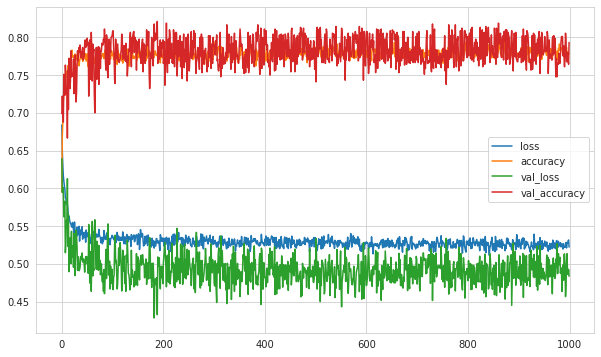

In [186]:
loss_df.plot();

In [187]:
model.evaluate(X_test, y_test, verbose=0)

[0.5006490349769592, 0.7760000228881836]

In [188]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5006490349769592
accuracy :  0.7760000228881836


In [189]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[645 151]
 [ 73 131]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       796
           1       0.46      0.64      0.54       204

    accuracy                           0.78      1000
   macro avg       0.68      0.73      0.70      1000
weighted avg       0.81      0.78      0.79      1000



In [ ]:
# model.summary()

# loss_df = pd.DataFrame(model.history.history)
# loss_df.head()

# loss_df.plot();

# model.evaluate(X_test, y_test, verbose=0)

# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print("loss : ", loss)
# print("accuracy : ", accuracy)

# y_pred = model.predict(X_test) > 0.5
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

## GridSearchCV

In [194]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [212]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [213]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 20)

In [214]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "adagrad", "adadelta"]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7963
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7963
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8017
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8070
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8126
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8136
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8162
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8183
Epoch 9/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8206
Epoch 10/200
141/141 [========

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fadc1987790>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [215]:
grid_model.best_score_

0.8627777777777779

In [216]:
grid_model.best_params_

{'batch_size': 64, 'optimizer': 'adam'}

In [217]:
grid_model.cv_results_

{'mean_fit_time': array([49.50700722, 59.99936059, 12.6827491 , 66.02941623, 38.84926119,
        40.355515  ,  8.13721471, 38.63445871]),
 'std_fit_time': array([11.51380211,  7.421853  ,  3.16442309, 28.09502589, 10.79743549,
        14.97173229,  2.50383829, 21.94431711]),
 'mean_score_time': array([12.14190745,  8.41058388,  2.83999233, 23.69236505, 10.71432474,
         9.42842071,  0.7354177 ,  3.3177006 ]),
 'std_score_time': array([16.5489788 , 11.84100226,  3.33069778, 24.54423176, 13.94370399,
        11.49727904,  1.06426184,  7.7014567 ]),
 'param_batch_size': masked_array(data=[32, 32, 32, 32, 64, 64, 64, 64],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_optimizer': masked_array(data=['adam', 'rmsprop', 'adagrad', 'adadelta', 'adam',
                    'rmsprop', 'adagrad', 'adadelta'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=

In [218]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
4,0.863,0.009,1,"{'batch_size': 64, 'optimizer': 'adam'}"
5,0.863,0.008,2,"{'batch_size': 64, 'optimizer': 'rmsprop'}"
0,0.860,0.006,3,"{'batch_size': 32, 'optimizer': 'adam'}"
1,0.858,0.007,4,"{'batch_size': 32, 'optimizer': 'rmsprop'}"
2,0.796,0.018,5,"{'batch_size': 32, 'optimizer': 'adagrad'}"
3,0.796,0.018,5,"{'batch_size': 32, 'optimizer': 'adadelta'}"
6,0.796,0.018,5,"{'batch_size': 64, 'optimizer': 'adagrad'}"
7,0.796,0.018,8,"{'batch_size': 64, 'optimizer': 'adadelta'}"


In [219]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[756  40]
 [120  84]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.68      0.41      0.51       204

    accuracy                           0.84      1000
   macro avg       0.77      0.68      0.71      1000
weighted avg       0.83      0.84      0.82      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


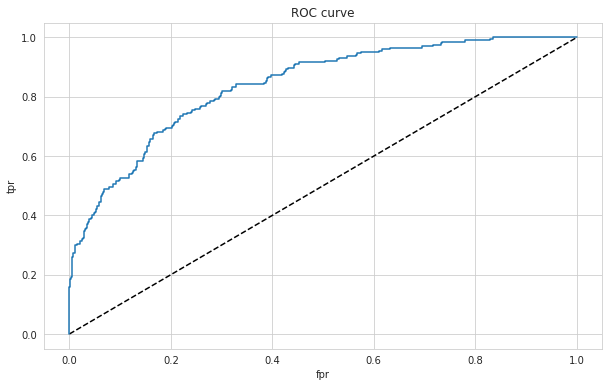

In [220]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [222]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [223]:
final_model = Sequential()

final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(8, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [224]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [227]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights

array([0.62787777, 2.45499182])

In [229]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 64, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop])

Epoch 1/1000
141/141 [==============================] - 1s 3ms/step - loss: 0.4866 - accuracy: 0.7938 - val_loss: 0.4631 - val_accuracy: 0.8010
Epoch 2/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8140 - val_loss: 0.4373 - val_accuracy: 0.8140
Epoch 3/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8300 - val_loss: 0.4081 - val_accuracy: 0.8270
Epoch 4/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8424 - val_loss: 0.3902 - val_accuracy: 0.8290
Epoch 5/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8503 - val_loss: 0.3908 - val_accuracy: 0.8310
Epoch 6/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8550 - val_loss: 0.3888 - val_accuracy: 0.8300
Epoch 7/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8578 - val_loss: 0.3808 - val_accuracy:

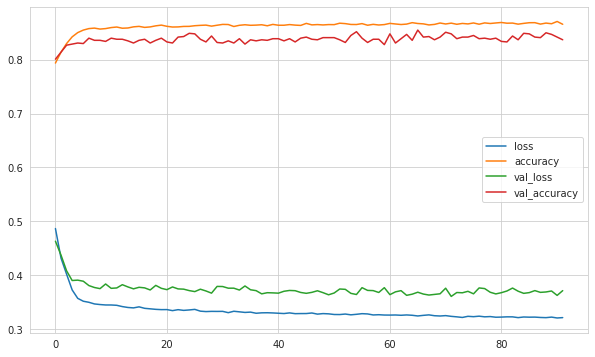

In [233]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [231]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5006490349769592
accuracy :  0.7760000228881836


In [232]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[645 151]
 [ 73 131]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       796
           1       0.46      0.64      0.54       204

    accuracy                           0.78      1000
   macro avg       0.68      0.73      0.70      1000
weighted avg       0.81      0.78      0.79      1000



In [234]:
model.save('model_churn.h5')

## Prediction

In [240]:
from tensorflow.keras.models import load_model

In [242]:
model_fake_reg = load_model('model_churn.h5')

In [244]:
Churn_Prediction = pickle.load(open("scaler_churn", "rb"))

In [245]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [246]:
single_customer = Churn_Prediction.transform(single_customer)
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 0.        , 0.        ,
        0.        ]])

In [248]:
(model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 33ms/step


array([[1]], dtype=int32)

In [249]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___